**Name:** Ho Teng Hwong, Andrew

**Last Updated Date:** Thursday, 12 August 2021
# Stock Market Analysis + Prediction with ARIMA
Stock market analysis of Apple, Google, Facebook and Microsoft with Time Series Forecast using Auto-ARIMA.

### Business Questions / Scope of Work:
**[1. What was the change in stock price for the past 1 year?](#question1)**

**[2. What was the change in sales volume for the past 1 year?](#question2)**

**[3. What was the moving average of the various stocks?](#question3)**

**[4. What was the daily return of the stocks on average?](#question4)**

**[5. What was the correlation between different stocks?](#question5)**

**[6. How much value do we put at risk by investing in a particular stock?](#question6)**

**[7. Prediction with ARIMA Time-Series Forecast.](#question7)**



# Data Analysis (EDA) & Preparation


## Importing Packages and Libraries
We begin with loading the data set and all the required libraries / packages.

In [1]:
#pip install pandas-datareader
#pip install pmdarima
#pip install -U scikit-learn
#pip install yfinance

# Analysis referenced from: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm

import pandas as pd # Used for data manipulation
import numpy as np # Used for scientific and mathematical calculations
import math # Used for mathematical functions

import matplotlib.pyplot as plt  # Used for plotting
from matplotlib.dates import DateFormatter, MonthLocator  # Used for getting months for plot
from matplotlib import ticker # Used for formatting tickers on plot
from matplotlib.ticker import FuncFormatter # Used for formatting tickers on plot
import seaborn as sns # Used for plotting
from pandas.plotting import lag_plot # Used for auto-correlation plotting
from statsmodels.tsa.arima.model import ARIMA # Used for time-series forecasting
from sklearn.metrics import mean_squared_error # Used for determining average squared value across all test set predictions

sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf
yf.pdr_override()

from pandas_datareader import data as pdr


# For time stamps
from datetime import datetime

# used for modeling
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

from sklearn.metrics import mean_absolute_percentage_error as MAPE

## Setting Date Range and Stocks

In [2]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Determine list of stocks
company_list = ['AAPL', 'GOOG', 'FB', 'MSFT']
companies = ["APPLE", "GOOGLE", "FACEBOOK", "MICROSOFT"]


# Download Dataframe from Yahoo Finance
df1 = pdr.get_data_yahoo("AAPL", start, end)
df2 = pdr.get_data_yahoo("GOOG", start, end)
df3 = pdr.get_data_yahoo("FB", start, end)
df4 = pdr.get_data_yahoo("MSFT", start, end)


# # Alternatively, load csv dataframe from local path
# df1 = pd.read_excel('AAPL.csv')
# df2 = pd.read_excel('GOOG.csv')
# df3 = pd.read_excel('FB.csv')
# df4 = pd.read_excel('MSFT.csv')


# # Alternatively, load xlsx dataframe from local path
# df1 = pd.read_excel('AAPL.xlsx')
# df2 = pd.read_excel('GOOG.xlsx')
# df3 = pd.read_excel('FB.xlsx')
# df4 = pd.read_excel('MSFT.xlsx')


# Add column 'company_name'
df1['company_name'] = 'APPLE'
df2['company_name'] = 'GOOGLE'
df3['company_name'] = 'FACEBOOK'
df4['company_name'] = 'MICROSOFT'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Formatting of Dataframes

In [3]:
# Format data columns for df1
df1 = df1.rename(columns = {
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'
    },inplace = False)

# Format data columns for df2
df2 = df2.rename(columns = {
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'
    },inplace = False)

# Format data columns for df3
df3 = df3.rename(columns = {
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'
    },inplace = False)

# Format data columns for df4
df4 = df4.rename(columns = {
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'
    },inplace = False)


## Data Analysis - Basic Summary Description & Info of Stocks

In [4]:
# Summary description of df1
df1.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,open,high,low,close,adj_close,volume
count,254.00,254.00,254.00,254.00,254.00,254.00
mean,127.10,128.55,125.51,127.05,126.58,111856445.13
std,9.94,9.82,10.10,10.02,10.15,49121611.69
min,104.54,110.19,103.10,106.84,106.16,29527362.00
25%,119.92,121.18,118.21,119.92,119.54,78969025.00
50%,126.47,127.74,125.08,126.16,125.76,98980650.00
75%,133.77,134.95,131.90,133.49,133.09,127901525.00
max,149.24,150.00,147.70,149.15,148.93,345937600.00


In [5]:
# Summary info of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-08-11 to 2021-08-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          254 non-null    float64
 1   high          254 non-null    float64
 2   low           254 non-null    float64
 3   close         254 non-null    float64
 4   adj_close     254 non-null    float64
 5   volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
# Summary description of df2
df2.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,open,high,low,close,adj_close,volume
count,254.00,254.00,254.00,254.00,254.00,254.00
mean,2024.55,2045.99,2006.83,2027.16,2027.16,1508928.52
std,394.04,392.76,394.38,395.05,395.05,612853.24
min,1411.03,1443.71,1406.55,1415.21,1415.21,194244.00
25%,1725.78,1747.75,1709.03,1733.00,1733.00,1130800.00
50%,2041.95,2068.92,2016.87,2037.72,2037.72,1359850.00
75%,2368.06,2381.46,2342.36,2356.58,2356.58,1736325.00
max,2800.22,2800.22,2753.02,2792.89,2792.89,4329100.00


In [7]:
# Summary info of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-08-11 to 2021-08-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          254 non-null    float64
 1   high          254 non-null    float64
 2   low           254 non-null    float64
 3   close         254 non-null    float64
 4   adj_close     254 non-null    float64
 5   volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [8]:
# Summary description of df3
df3.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,open,high,low,close,adj_close,volume
count,254.00,254.00,254.00,254.00,254.00,254.00
mean,293.38,297.18,289.70,293.41,293.41,19112233.57
std,32.74,32.63,32.96,33.10,33.10,7749102.76
min,246.50,249.95,244.13,245.64,245.64,2670926.00
25%,268.53,271.01,264.65,267.42,267.42,14339825.00
50%,278.78,284.05,274.93,278.75,278.75,17328000.00
75%,317.54,320.16,313.24,317.83,317.83,22899525.00
max,374.56,377.55,368.22,373.28,373.28,69015200.00


In [9]:
# Summary info of df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-08-11 to 2021-08-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          254 non-null    float64
 1   high          254 non-null    float64
 2   low           254 non-null    float64
 3   close         254 non-null    float64
 4   adj_close     254 non-null    float64
 5   volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [10]:
# Summary description of df4
df4.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,open,high,low,close,adj_close,volume
count,254.00,254.00,254.00,254.00,254.00,254.00
mean,236.18,238.45,234.06,236.36,235.54,27950389.37
std,24.39,24.14,24.64,24.56,25.07,9125190.69
min,197.19,202.71,196.25,200.39,198.95,4777499.00
25%,214.53,216.65,212.92,214.82,213.35,22606200.00
50%,232.36,235.28,230.24,232.40,231.84,25704500.00
75%,252.62,254.26,251.04,252.50,251.92,32331675.00
max,289.75,291.55,287.81,289.67,289.67,69870600.00


In [11]:
# Summary info of df4
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-08-11 to 2021-08-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          254 non-null    float64
 1   high          254 non-null    float64
 2   low           254 non-null    float64
 3   close         254 non-null    float64
 4   adj_close     254 non-null    float64
 5   volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


### Business Questions / Scope of Work (Recap):
**[1. What was the change in stock price for the past 1 year?](#question1)**

**[2. What was the change in sales volume for the past 1 year?](#question2)**

**[3. What was the moving average of the various stocks?](#question3)**

**[4. What was the daily return of the stocks on average?](#question4)**

**[5. What was the correlation between different stocks?](#question5)**

**[6. How much value do we put at risk by investing in a particular stock?](#question6)**

**[7. Prediction with ARIMA Time-Series Forecast.](#question7)**



<a id='question1'></a>
## 1. Change in Stock Price for Past 1 Year

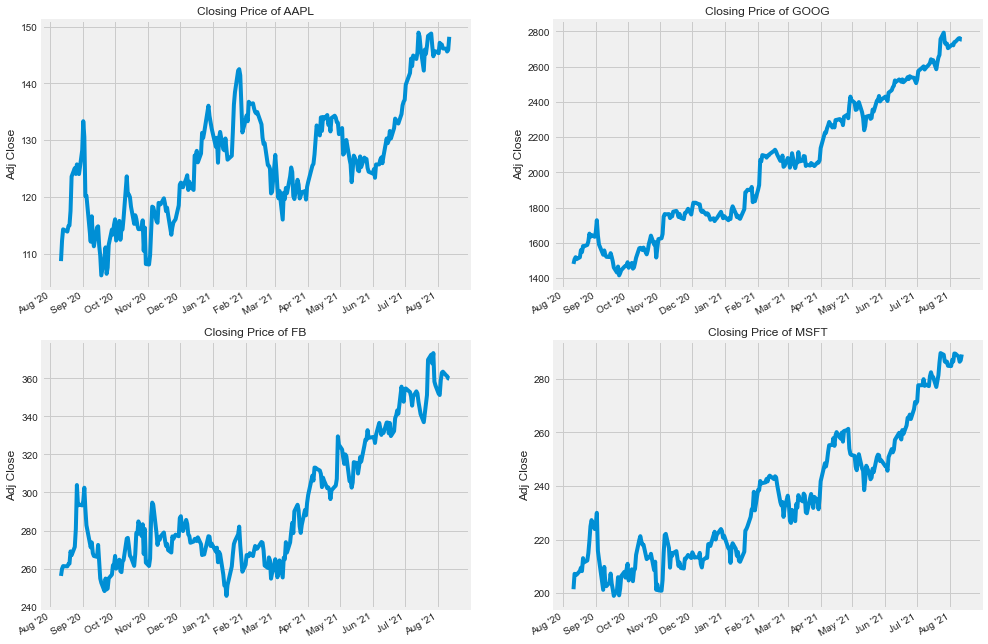

In [12]:
# Summary plot for the 4 stocks on closing price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    
df1['adj_close'].plot(ax=axes[0,0])
df2['adj_close'].plot(ax=axes[0,1])
df3['adj_close'].plot(ax=axes[1,0])
df4['adj_close'].plot(ax=axes[1,1])

months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")

flat_ax = axes.flatten()
for n, axes in enumerate(flat_ax):
    axes.set_title(f"Closing Price of {company_list[n]}",fontsize=12)
    axes.set(xlabel=None, ylabel="Adj Close")
    axes.xaxis.set_major_locator(months)
    axes.xaxis.set_major_formatter(monthsFmt)

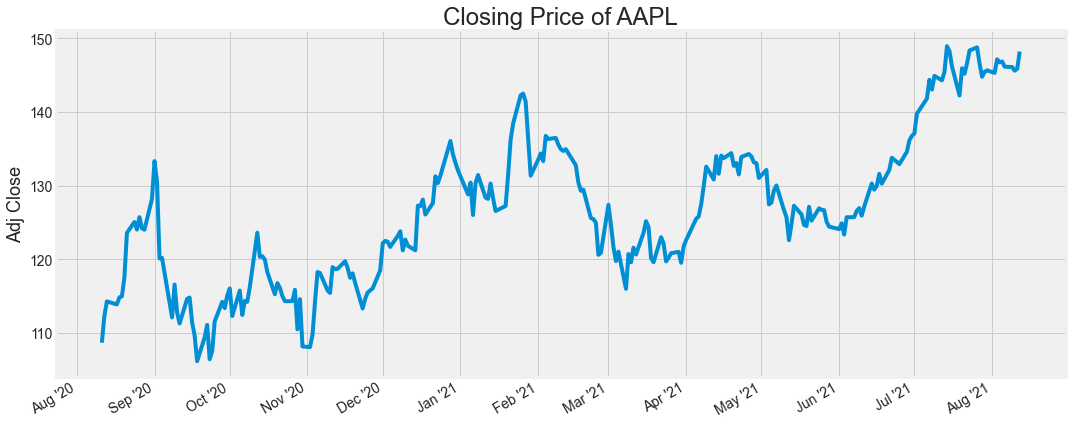

In [13]:
# Observe the historical view of the closing price for AAPL

plt.figure(figsize=(15, 6))


ax = df1['adj_close'].plot()
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Closing Price of {company_list[0]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.tight_layout()

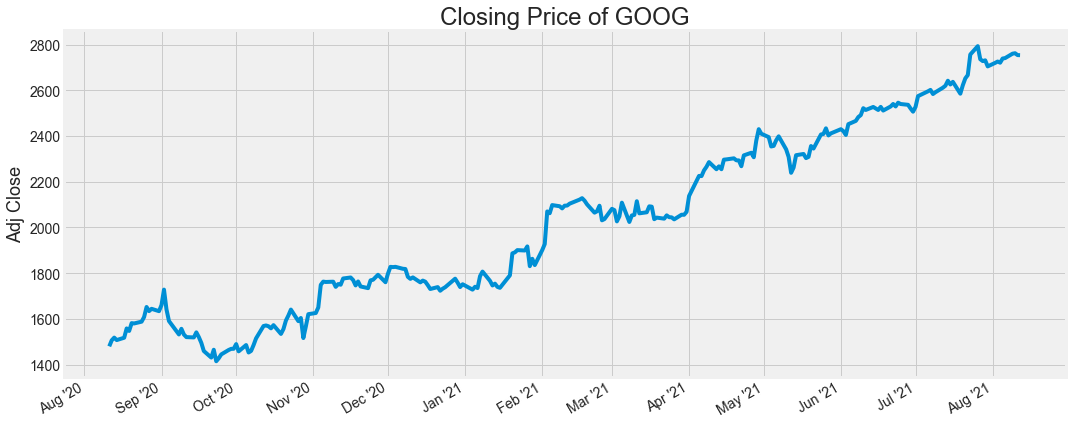

In [14]:
# Observe the historical view of the closing price for GOOG

plt.figure(figsize=(15, 6))


ax = df2['adj_close'].plot()
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Closing Price of {company_list[1]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.tight_layout()


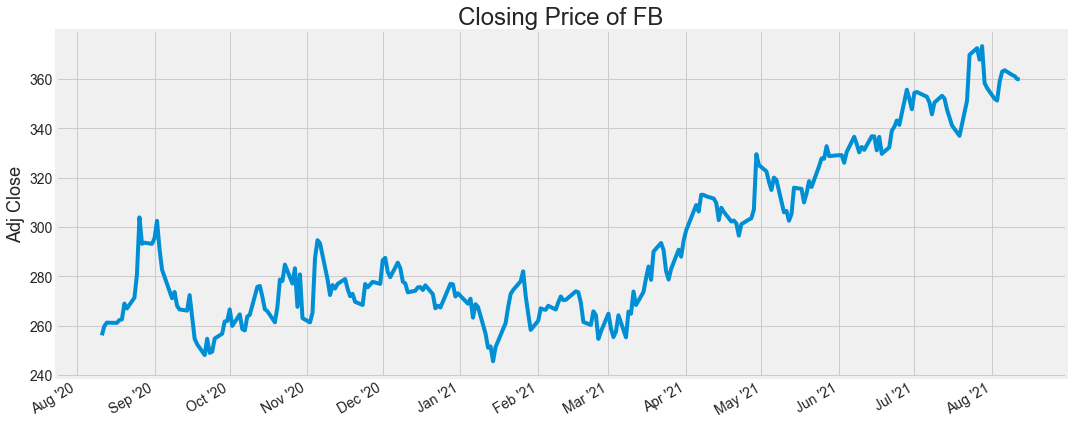

In [15]:
# Observe the historical view of the closing price for FB

plt.figure(figsize=(15, 6))


ax = df3['adj_close'].plot()
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Closing Price of {company_list[2]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.tight_layout()


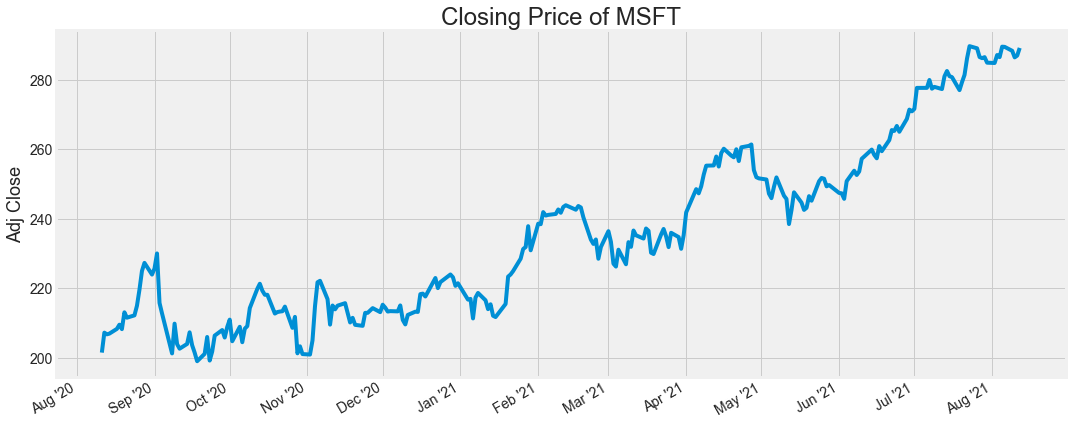

In [16]:
# Observe the historical view of the closing price for MSFT

plt.figure(figsize=(15, 6))


ax = df4['adj_close'].plot()
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Closing Price of {company_list[3]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.tight_layout()


In [17]:
# latest closing price for AAPL

df1_latest_adj_close = df1['adj_close'].tail(1).mean()

print(str(company_list[0]))
print("For reference, " + str(company_list[0]) + "'s latest closing price is $" + str((f'{round(df1_latest_adj_close,2):}')) + ".")
print('\n')


# latest closing price for GOOG

df2_latest_adj_close = df2['adj_close'].tail(1).mean()

print(str(company_list[1]))
print("For reference, " + str(company_list[1]) + "'s latest closing price is $" + str((f'{round(df2_latest_adj_close,2):}')) + ".")
print('\n')


# latest closing price for FB

df3_latest_adj_close = df3['adj_close'].tail(1).mean()

print(str(company_list[2]))
print("For reference, " + str(company_list[2]) + "'s latest closing price is $" + str((f'{round(df3_latest_adj_close,2):}')) + ".")
print('\n')


# latest closing price MSFT

df4_latest_adj_close = df4['adj_close'].tail(1).mean()

print(str(company_list[3]))
print("For reference, " + str(company_list[3]) + "'s latest closing price is $" + str((f'{round(df4_latest_adj_close,2):}')) + ".")
print('\n')


AAPL
For reference, AAPL's latest closing price is $148.19.


GOOG
For reference, GOOG's latest closing price is $2753.41.


FB
For reference, FB's latest closing price is $359.81.


MSFT
For reference, MSFT's latest closing price is $289.16.




<a id='question2'></a>
## 2. Change in Stock Volume for Past 1 Year

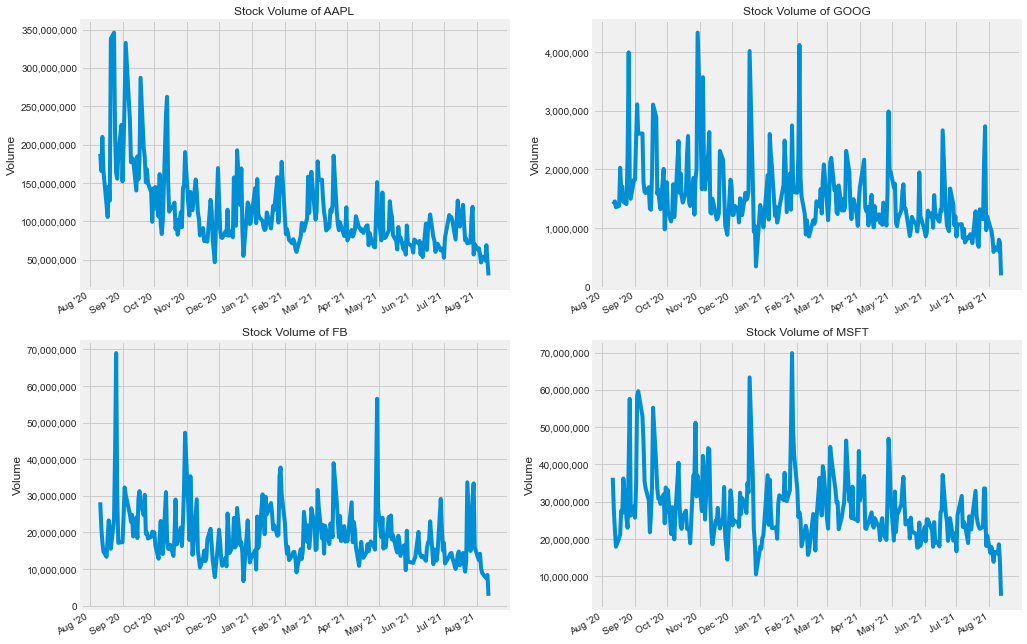

In [18]:
# Summary plot for the 4 stocks on volume
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    
df1['volume'].plot(ax=axes[0,0])
df2['volume'].plot(ax=axes[0,1])
df3['volume'].plot(ax=axes[1,0])
df4['volume'].plot(ax=axes[1,1])

months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")

flat_ax = axes.flatten()
for n, axes in enumerate(flat_ax):
    axes.set_title(f"Stock Volume of {company_list[n]}",fontsize=12)
    axes.set(xlabel=None, ylabel="Volume")
    axes.xaxis.set_major_locator(months)
    axes.xaxis.set_major_formatter(monthsFmt)
    axes.yaxis.get_major_formatter().set_scientific(False)
    axes.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


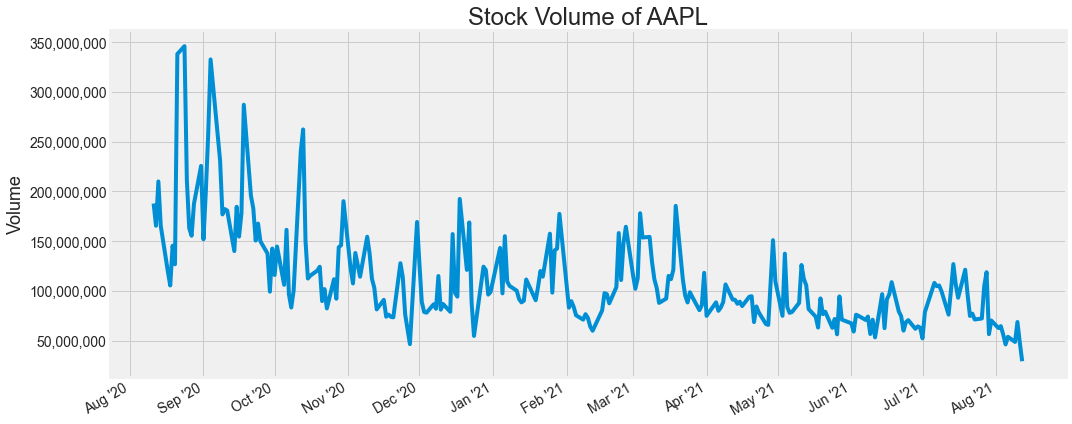

In [19]:
# Observe the historical view of the volume for AAPL

plt.figure(figsize=(15, 6))

ax = df1['volume'].plot()
plt.ylabel('Volume',fontsize=18)
plt.xlabel(None)
plt.title(f"Stock Volume of {company_list[0]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

# Set formatter to suppress scientic notation to numbers on y-axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Set formatter for numbers to have commas on y-axis
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


plt.tight_layout()

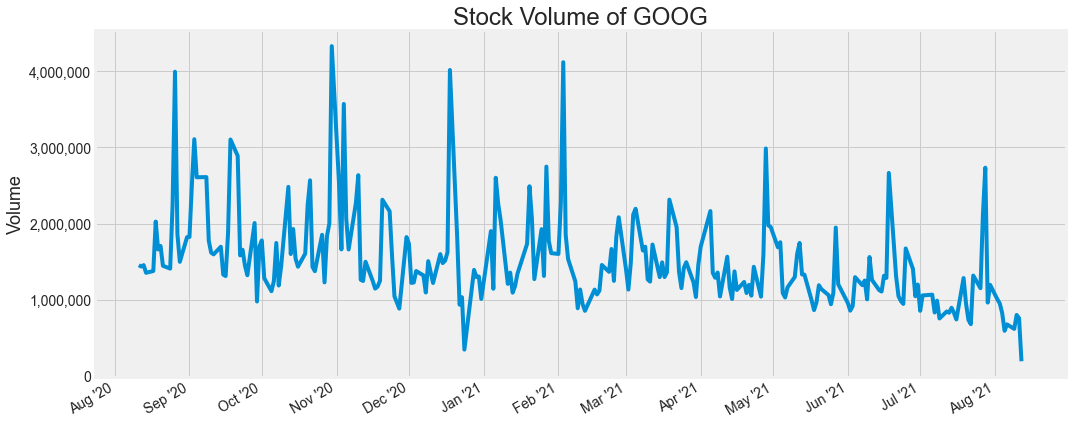

In [20]:
# Observe the historical view of the volume for GOOG

plt.figure(figsize=(15, 6))

ax = df2['volume'].plot()
plt.ylabel('Volume',fontsize=18)
plt.xlabel(None)
plt.title(f"Stock Volume of {company_list[1]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

# Set formatter to suppress scientic notation to numbers on y-axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Set formatter for numbers to have commas on y-axis
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


plt.tight_layout()

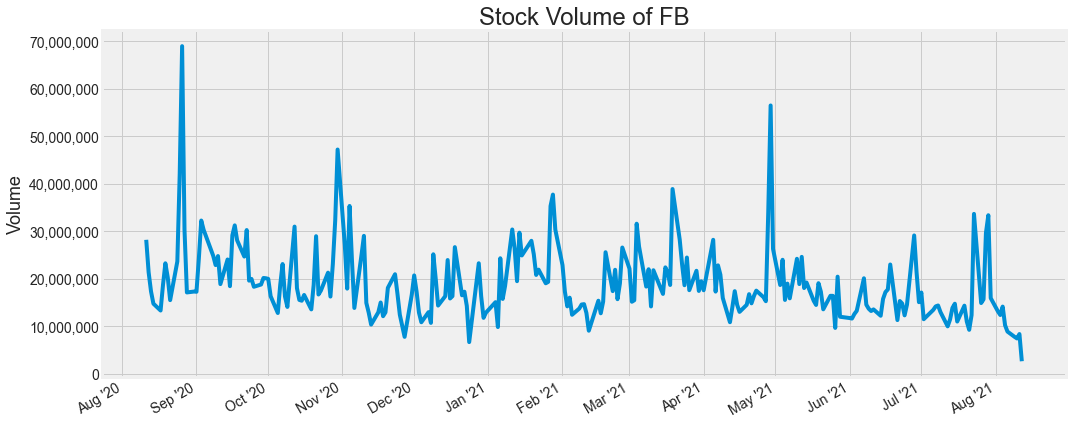

In [21]:
# Observe the historical view of the volume for FB

plt.figure(figsize=(15, 6))

ax = df3['volume'].plot()
plt.ylabel('Volume',fontsize=18)
plt.xlabel(None)
plt.title(f"Stock Volume of {company_list[2]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

# Set formatter to suppress scientic notation to numbers on y-axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Set formatter for numbers to have commas on y-axis
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


plt.tight_layout()

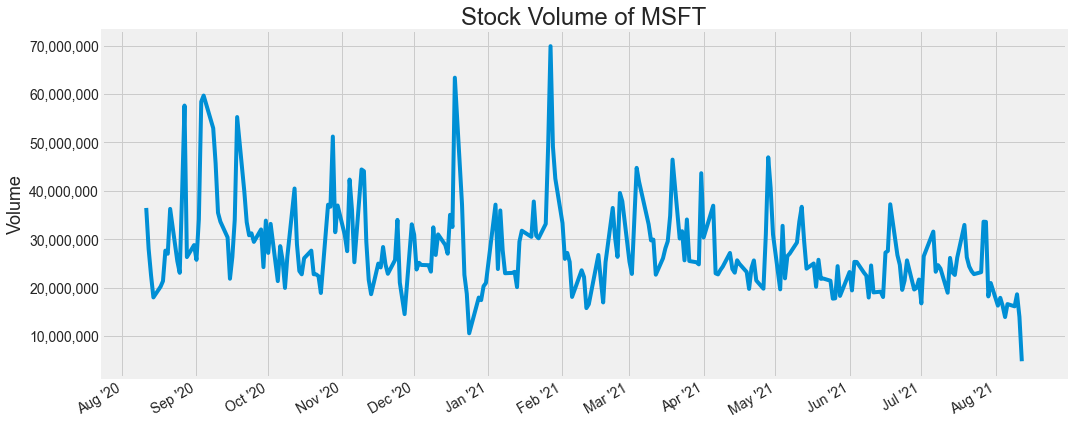

In [22]:
# Observe the historical view of the volume for MSFT

plt.figure(figsize=(15, 6))

ax = df4['volume'].plot()
plt.ylabel('Volume',fontsize=18)
plt.xlabel(None)
plt.title(f"Stock Volume of {company_list[3]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

# Set formatter to suppress scientic notation to numbers on y-axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Set formatter for numbers to have commas on y-axis
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()

In [23]:
# latest stock volume for AAPL

df1_latest_vol = df1['volume'].tail(1).mean()

print(str(company_list[0]))
print("For reference, " + str(company_list[0]) + "'s latest stock volume is " + str(f'{int(df1_latest_vol):,}') + ".")
print('\n')


# latest stock volume for GOOG

df2_latest_vol = df2['volume'].tail(1).mean()

print(str(company_list[1]))
print("For reference, " + str(company_list[1]) + "'s latest stock volume is " + str(f'{int(df2_latest_vol):,}') + ".")
print('\n')


# latest stock volume for FB

df3_latest_vol = df3['volume'].tail(1).mean()

print(str(company_list[2]))
print("For reference, " + str(company_list[2]) + "'s latest stock volume is " + str(f'{int(df3_latest_vol):,}') + ".")
print('\n')


# latest stock volume for MSFT

df4_latest_vol = df4['volume'].tail(1).mean()

print(str(company_list[3]))
print("For reference, " + str(company_list[3]) + "'s latest stock volume is " + str(f'{int(df4_latest_vol):,}') + ".")
print('\n')


AAPL
For reference, AAPL's latest stock volume is 29,527,362.


GOOG
For reference, GOOG's latest stock volume is 194,244.


FB
For reference, FB's latest stock volume is 2,670,926.


MSFT
For reference, MSFT's latest stock volume is 4,777,499.




<a id='question3'></a>
## 3. Moving Average of the Various Stocks

In [24]:
# Adding moving average columns for window 10, 20 and 50 days

df1['ma_10_days'] = df1['adj_close'].rolling(window=10).mean()
df1['ma_20_days'] = df1['adj_close'].rolling(window=20).mean()
df1['ma_50_days'] = df1['adj_close'].rolling(window=50).mean()
#df1.head(20)

df2['ma_10_days'] = df2['adj_close'].rolling(window=10).mean()
df2['ma_20_days'] = df2['adj_close'].rolling(window=20).mean()
df2['ma_50_days'] = df2['adj_close'].rolling(window=50).mean()
#df2.head(20)

df3['ma_10_days'] = df3['adj_close'].rolling(window=10).mean()
df3['ma_20_days'] = df3['adj_close'].rolling(window=20).mean()
df3['ma_50_days'] = df3['adj_close'].rolling(window=50).mean()
#df3.head(20)

df4['ma_10_days'] = df4['adj_close'].rolling(window=10).mean()
df4['ma_20_days'] = df4['adj_close'].rolling(window=20).mean()
df4['ma_50_days'] = df4['adj_close'].rolling(window=50).mean()
#df4.head(20)


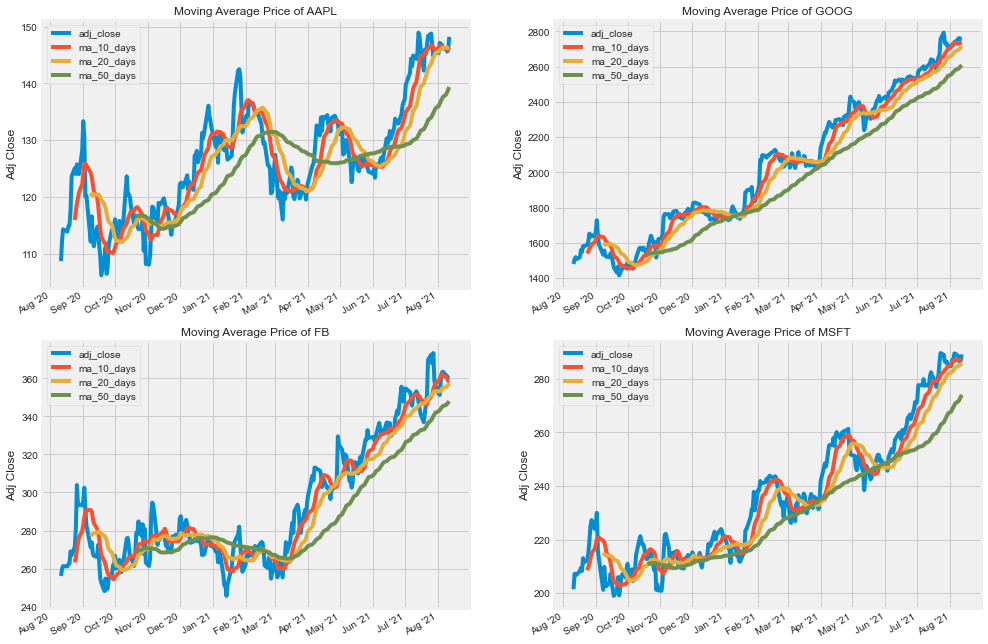

In [25]:
# Summary plot for the 4 stocks on moving average price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    
df1[['adj_close','ma_10_days','ma_20_days','ma_50_days']].plot(ax=axes[0,0])
df2[['adj_close','ma_10_days','ma_20_days','ma_50_days']].plot(ax=axes[0,1])
df3[['adj_close','ma_10_days','ma_20_days','ma_50_days']].plot(ax=axes[1,0])
df4[['adj_close','ma_10_days','ma_20_days','ma_50_days']].plot(ax=axes[1,1])

months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")

flat_ax = axes.flatten()
for n, axes in enumerate(flat_ax):
    axes.set_title(f"Moving Average Price of {company_list[n]}",fontsize=12)
    axes.set(xlabel=None, ylabel="Adj Close")
    axes.xaxis.set_major_locator(months)
    axes.xaxis.set_major_formatter(monthsFmt)

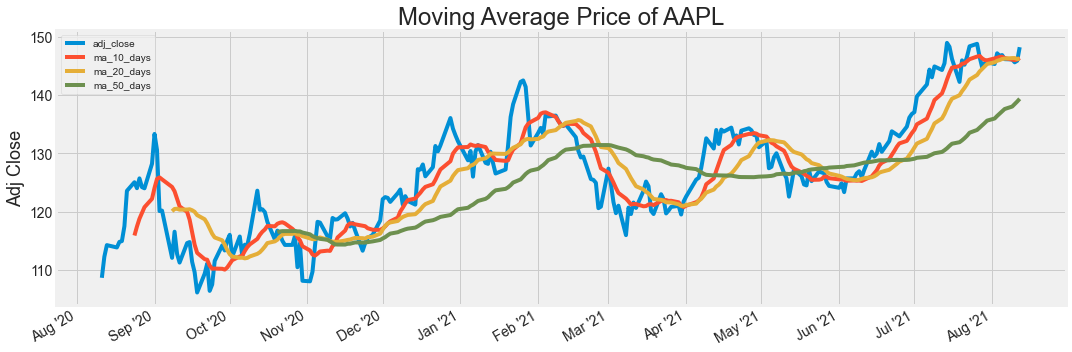

In [26]:
# Moving Average for AAPL

ax = df1[['adj_close','ma_10_days','ma_20_days','ma_50_days']].plot(figsize=(15, 5))
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Moving Average Price of {company_list[0]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)


plt.tight_layout()

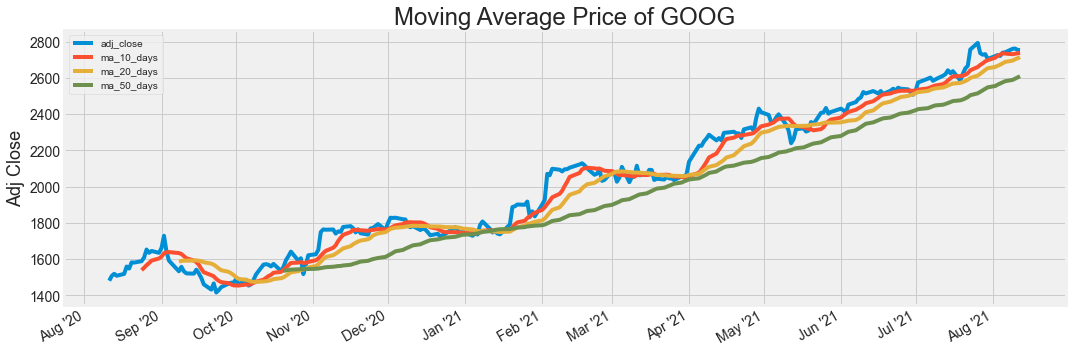

In [27]:
# Moving Average for GOOG

ax = df2[['adj_close','ma_10_days','ma_20_days','ma_50_days']].plot(figsize=(15, 5))
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Moving Average Price of {company_list[1]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)


plt.tight_layout()

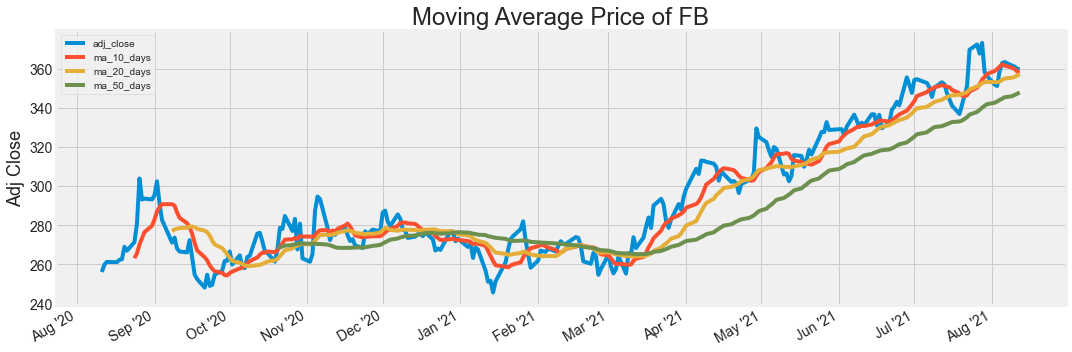

In [28]:
# Moving Average for FB

ax = df3[['adj_close','ma_10_days','ma_20_days','ma_50_days']].plot(figsize=(15, 5))
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Moving Average Price of {company_list[2]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)


plt.tight_layout()

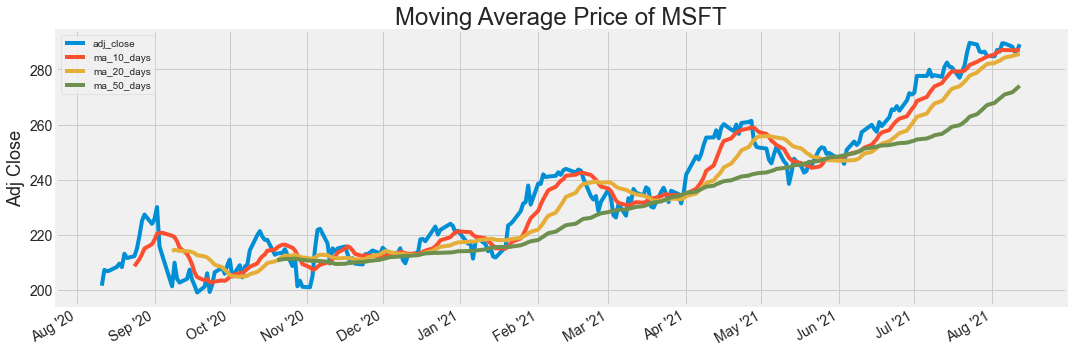

In [29]:
# Moving Average for MSFT

ax = df4[['adj_close','ma_10_days','ma_20_days','ma_50_days']].plot(figsize=(15, 5))
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Moving Average Price of {company_list[3]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)


plt.tight_layout()

In [30]:
# latest closing and moving average prices for AAPL

df1_latest_adj_close = df1['adj_close'].tail(1).mean()
df1_10days = df1['ma_10_days'].tail(1).mean()
df1_20days = df1['ma_20_days'].tail(1).mean()
df1_50days = df1['ma_50_days'].tail(1).mean()

print(str(company_list[0]))
print("For reference, " + str(company_list[0]) + "'s latest closing price is $" + str((f'{round(df1_latest_adj_close,2):}')) + ".")
print("For reference, " + str(company_list[0]) + "'s latest 10 days moving average is $" + str((f'{round(df1_10days,2):}')) + ".")
print("For reference, " + str(company_list[0]) + "'s latest 20 days moving average is $" + str((f'{round(df1_20days,2):}')) + ".")
print("For reference, " + str(company_list[0]) + "'s latest 50 days moving average is $" + str((f'{round(df1_50days,2):}')) + ".")
print('\n')


# latest closing and moving average prices for GOOG

df2_latest_adj_close = df2['adj_close'].tail(1).mean()
df2_10days = df2['ma_10_days'].tail(1).mean()
df2_20days = df2['ma_20_days'].tail(1).mean()
df2_50days = df2['ma_50_days'].tail(1).mean()

print(str(company_list[1]))
print("For reference, " + str(company_list[1]) + "'s latest closing price is $" + str((f'{round(df2_latest_adj_close,2):}')) + ".")
print("For reference, " + str(company_list[1]) + "'s latest 10 days moving average is $" + str((f'{round(df2_10days,2):}')) + ".")
print("For reference, " + str(company_list[1]) + "'s latest 20 days moving average is $" + str((f'{round(df2_20days,2):}')) + ".")
print("For reference, " + str(company_list[1]) + "'s latest 50 days moving average is $" + str((f'{round(df2_50days,2):}')) + ".")
print('\n')


# latest closing and moving average prices for FB

df3_latest_adj_close = df3['adj_close'].tail(1).mean()
df3_10days = df3['ma_10_days'].tail(1).mean()
df3_20days = df3['ma_20_days'].tail(1).mean()
df3_50days = df3['ma_50_days'].tail(1).mean()

print(str(company_list[2]))
print("For reference, " + str(company_list[2]) + "'s latest closing price is $" + str((f'{round(df3_latest_adj_close,2):}')) + ".")
print("For reference, " + str(company_list[2]) + "'s latest 10 days moving average is $" + str((f'{round(df3_10days,2):}')) + ".")
print("For reference, " + str(company_list[2]) + "'s latest 20 days moving average is $" + str((f'{round(df3_20days,2):}')) + ".")
print("For reference, " + str(company_list[2]) + "'s latest 50 days moving average is $" + str((f'{round(df3_50days,2):}')) + ".")
print('\n')


# latest closing and moving average prices for MSFT

df4_latest_adj_close = df4['adj_close'].tail(1).mean()
df4_10days = df4['ma_10_days'].tail(1).mean()
df4_20days = df4['ma_20_days'].tail(1).mean()
df4_50days = df4['ma_50_days'].tail(1).mean()

print(str(company_list[3]))
print("For reference, " + str(company_list[3]) + "'s latest closing price is $" + str((f'{round(df4_latest_adj_close,2):}')) + ".")
print("For reference, " + str(company_list[3]) + "'s latest 10 days moving average is $" + str((f'{round(df4_10days,2):}')) + ".")
print("For reference, " + str(company_list[3]) + "'s latest 20 days moving average is $" + str((f'{round(df4_20days,2):}')) + ".")
print("For reference, " + str(company_list[3]) + "'s latest 50 days moving average is $" + str((f'{round(df4_50days,2):}')) + ".")
print('\n')


AAPL
For reference, AAPL's latest closing price is $148.19.
For reference, AAPL's latest 10 days moving average is $146.35.
For reference, AAPL's latest 20 days moving average is $146.17.
For reference, AAPL's latest 50 days moving average is $139.34.


GOOG
For reference, GOOG's latest closing price is $2753.41.
For reference, GOOG's latest 10 days moving average is $2737.91.
For reference, GOOG's latest 20 days moving average is $2714.26.
For reference, GOOG's latest 50 days moving average is $2608.73.


FB
For reference, FB's latest closing price is $359.81.
For reference, FB's latest 10 days moving average is $358.74.
For reference, FB's latest 20 days moving average is $357.31.
For reference, FB's latest 50 days moving average is $347.9.


MSFT
For reference, MSFT's latest closing price is $289.16.
For reference, MSFT's latest 10 days moving average is $287.32.
For reference, MSFT's latest 20 days moving average is $285.79.
For reference, MSFT's latest 50 days moving average is $2

<a id='question4'></a>
## 4. Daily Return of Stocks on Average

In [31]:
# Add px_change column for each df, a division of adj_close from previous date
# temp_index created to set first value as 0 as there is nothing divide on
# px_change and px_change_nat_log may use = float("nan") or = 0 interchangebly
df1['px_change'] = df1['adj_close'].div(df1['adj_close'].shift(1)).fillna(df1['adj_close']).astype(float)
df1['temp_index'] = range(1, len(df1) + 1)
df1.loc[df1.temp_index == 1, 'px_change'] = float("nan")

df2['px_change'] = df2['adj_close'].div(df2['adj_close'].shift(1)).fillna(df2['adj_close']).astype(float)
df2['temp_index'] = range(1, len(df2) + 1)
df2.loc[df2.temp_index == 1, 'px_change'] = float("nan")

df3['px_change'] = df3['adj_close'].div(df3['adj_close'].shift(1)).fillna(df3['adj_close']).astype(float)
df3['temp_index'] = range(1, len(df3) + 1)
df3.loc[df3.temp_index == 1, 'px_change'] = float("nan")

df4['px_change'] = df4['adj_close'].div(df4['adj_close'].shift(1)).fillna(df4['adj_close']).astype(float)
df4['temp_index'] = range(1, len(df4) + 1)
df4.loc[df4.temp_index == 1, 'px_change'] = float("nan")


# Add px_change_nat_log column for each df, natural logarithm of price change to determine volatility
df1['px_change_nat_log'] = np.log(df1['px_change'])
df1.loc[df1.temp_index == 1, 'px_change_nat_log'] = float("nan")

df2['px_change_nat_log'] = np.log(df2['px_change'])
df2.loc[df2.temp_index == 1, 'px_change_nat_log'] = float("nan")

df3['px_change_nat_log'] = np.log(df3['px_change'])
df3.loc[df3.temp_index == 1, 'px_change_nat_log'] = float("nan")

df4['px_change_nat_log'] = np.log(df4['px_change'])
df4.loc[df4.temp_index == 1, 'px_change_nat_log'] = float("nan")


# px_change and temp_index are no longer needed
del df1['px_change']
del df1['temp_index']
del df2['px_change']
del df2['temp_index']
del df3['px_change']
del df3['temp_index']
del df4['px_change']
del df4['temp_index']


# Alternatively, instead of determining px_change_nat_log, a simpler method will be to use pct_change based on adj_close

# df1['daily_return'] = df1['adj_close'].pct_change()
# df2['daily_return'] = df1['adj_close'].pct_change()
# df3['daily_return'] = df1['adj_close'].pct_change()
# df4['daily_return'] = df1['adj_close'].pct_change()

# Note that if using daily_return, the scripts below have to be changed from px_change_nat_log to daily_return as well

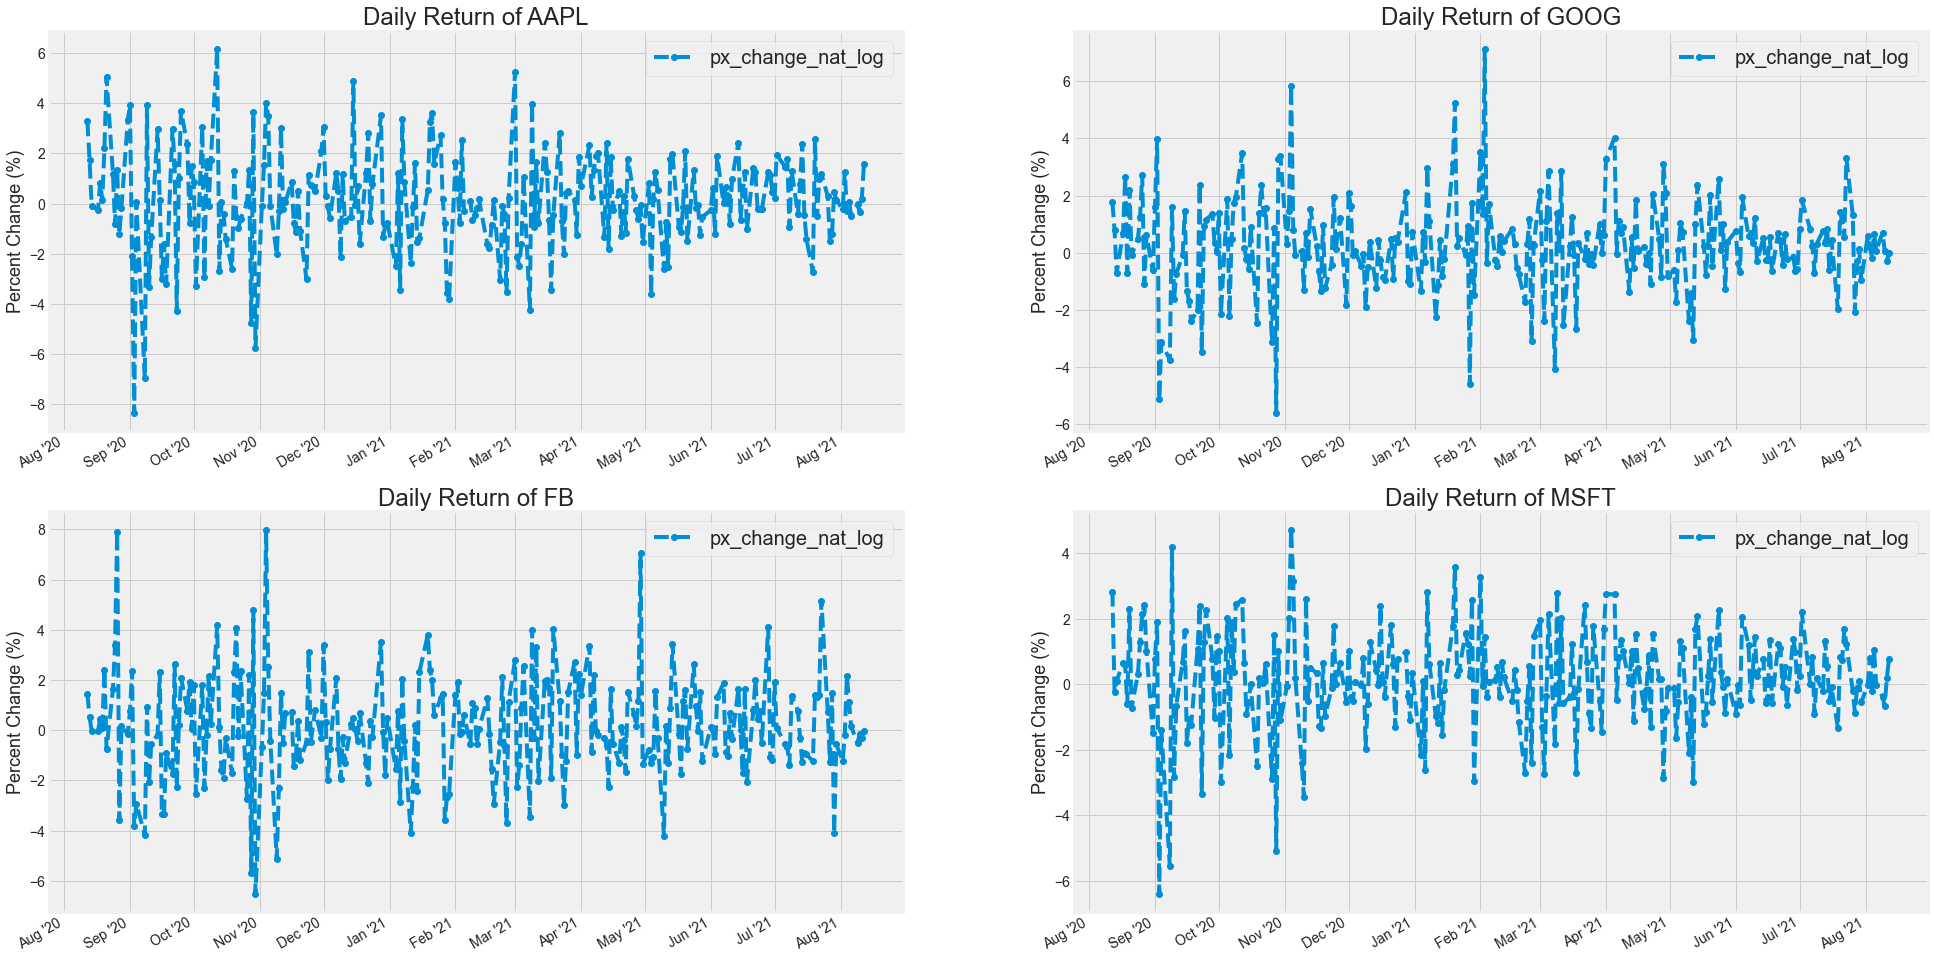

In [32]:
# Summary plot for the 4 stocks of daily return

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 18))


# Percent Change for AAPL based on natural logarithm (px_change_nat_log) to determine daily return
df1_daily_return = df1['px_change_nat_log'] * 100
ax1 = df1_daily_return.plot(legend=True, linestyle='--', marker='o', ax=axes[0,0]);
ax1.legend(fontsize=20) # using a size in points


# Percent Change for GOOG based on natural logarithm (px_change_nat_log) to determine daily return
df2_daily_return = df2['px_change_nat_log'] * 100
ax2 = df2_daily_return.plot(legend=True, linestyle='--', marker='o', ax=axes[0,1]);
ax2.legend(fontsize=20) # using a size in points


# Percent Change for FB based on natural logarithm (px_change_nat_log) to determine daily return
df3_daily_return = df3['px_change_nat_log'] * 100
ax3 = df3_daily_return.plot(legend=True, linestyle='--', marker='o', ax=axes[1,0]);
ax3.legend(fontsize=20) # using a size in points


# Percent Change for MSFT based on natural logarithm (px_change_nat_log) to determine daily return
df4_daily_return = df4['px_change_nat_log'] * 100
ax4 = df4_daily_return.plot(legend=True, linestyle='--', marker='o', ax=axes[1,1]);
ax4.legend(fontsize=20) # using a size in points


months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")

for i, _ax_ in enumerate(axes.flatten()):
    _ax_.set_ylabel('Percent Change (%)',fontsize=18)
    _ax_.set_xlabel(None)
    _ax_.set_title(f"Daily Return of {company_list[i]}",fontsize=24)
    _ax_.tick_params(axis="x", labelsize=14)
    _ax_.tick_params(axis="y", labelsize=14)
    
    _ax_.xaxis.set_major_locator(months)
    _ax_.xaxis.set_major_formatter(monthsFmt)

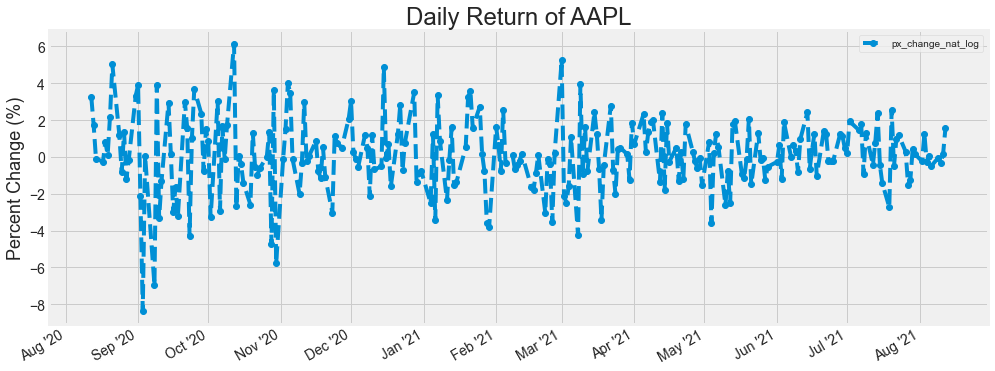

In [33]:
# Percent Change for AAPL based on natural logarithm (px_change_nat_log) to determine daily return
plt.figure(figsize=(15, 6))

df1_daily_return = df1['px_change_nat_log'] * 100

ax = df1_daily_return.plot(legend=True, linestyle='--', marker='o')
plt.ylabel('Percent Change (%)',fontsize=18)
plt.xlabel(None)
plt.title(f"Daily Return of {company_list[0]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)


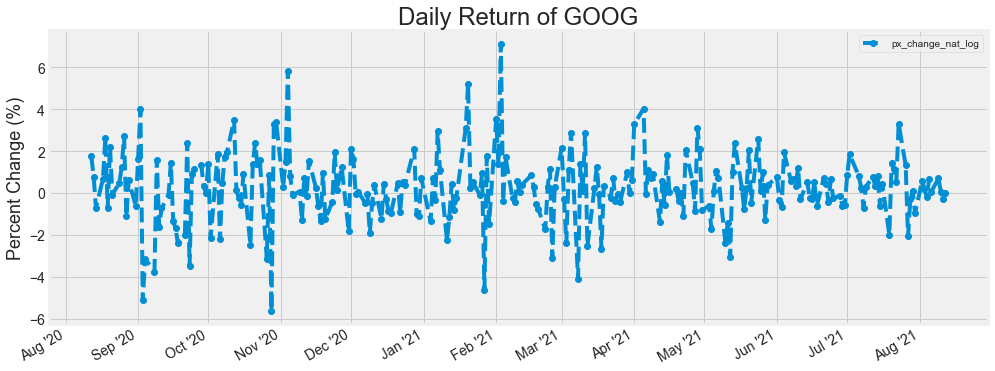

In [34]:
# Percent Change for GOOG based on natural logarithm (px_change_nat_log) to determine daily return
plt.figure(figsize=(15, 6))

df2_daily_return = df2['px_change_nat_log'] * 100

ax = df2_daily_return.plot(legend=True, linestyle='--', marker='o')
plt.ylabel('Percent Change (%)',fontsize=18)
plt.xlabel(None)
plt.title(f"Daily Return of {company_list[1]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)



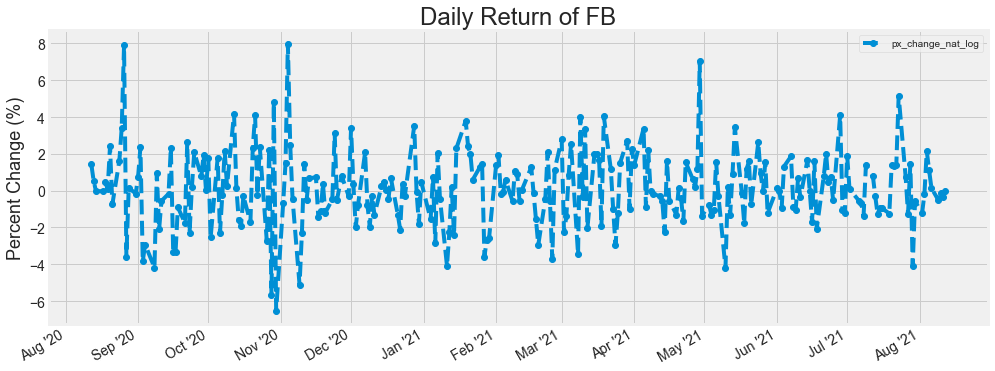

In [35]:
# Percent Change for FB based on natural logarithm (px_change_nat_log) to determine daily return
plt.figure(figsize=(15, 6))

df3_daily_return = df3['px_change_nat_log'] * 100

ax = df3_daily_return.plot(legend=True, linestyle='--', marker='o')
plt.ylabel('Percent Change (%)',fontsize=18)
plt.xlabel(None)
plt.title(f"Daily Return of {company_list[2]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)



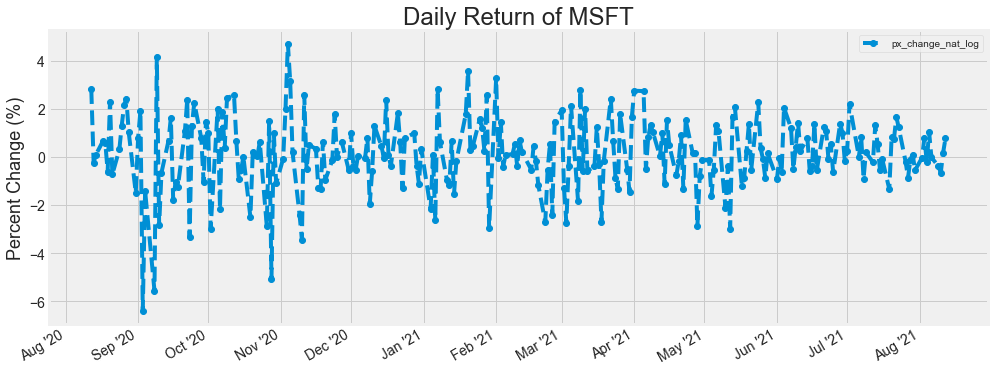

In [36]:
# Percent Change for MSFT based on natural logarithm (px_change_nat_log) to determine daily return
plt.figure(figsize=(15, 6))

df4_daily_return = df4['px_change_nat_log'] * 100

ax = df4_daily_return.plot(legend=True, linestyle='--', marker='o')
plt.ylabel('Percent Change (%)',fontsize=18)
plt.xlabel(None)
plt.title(f"Daily Return of {company_list[3]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)



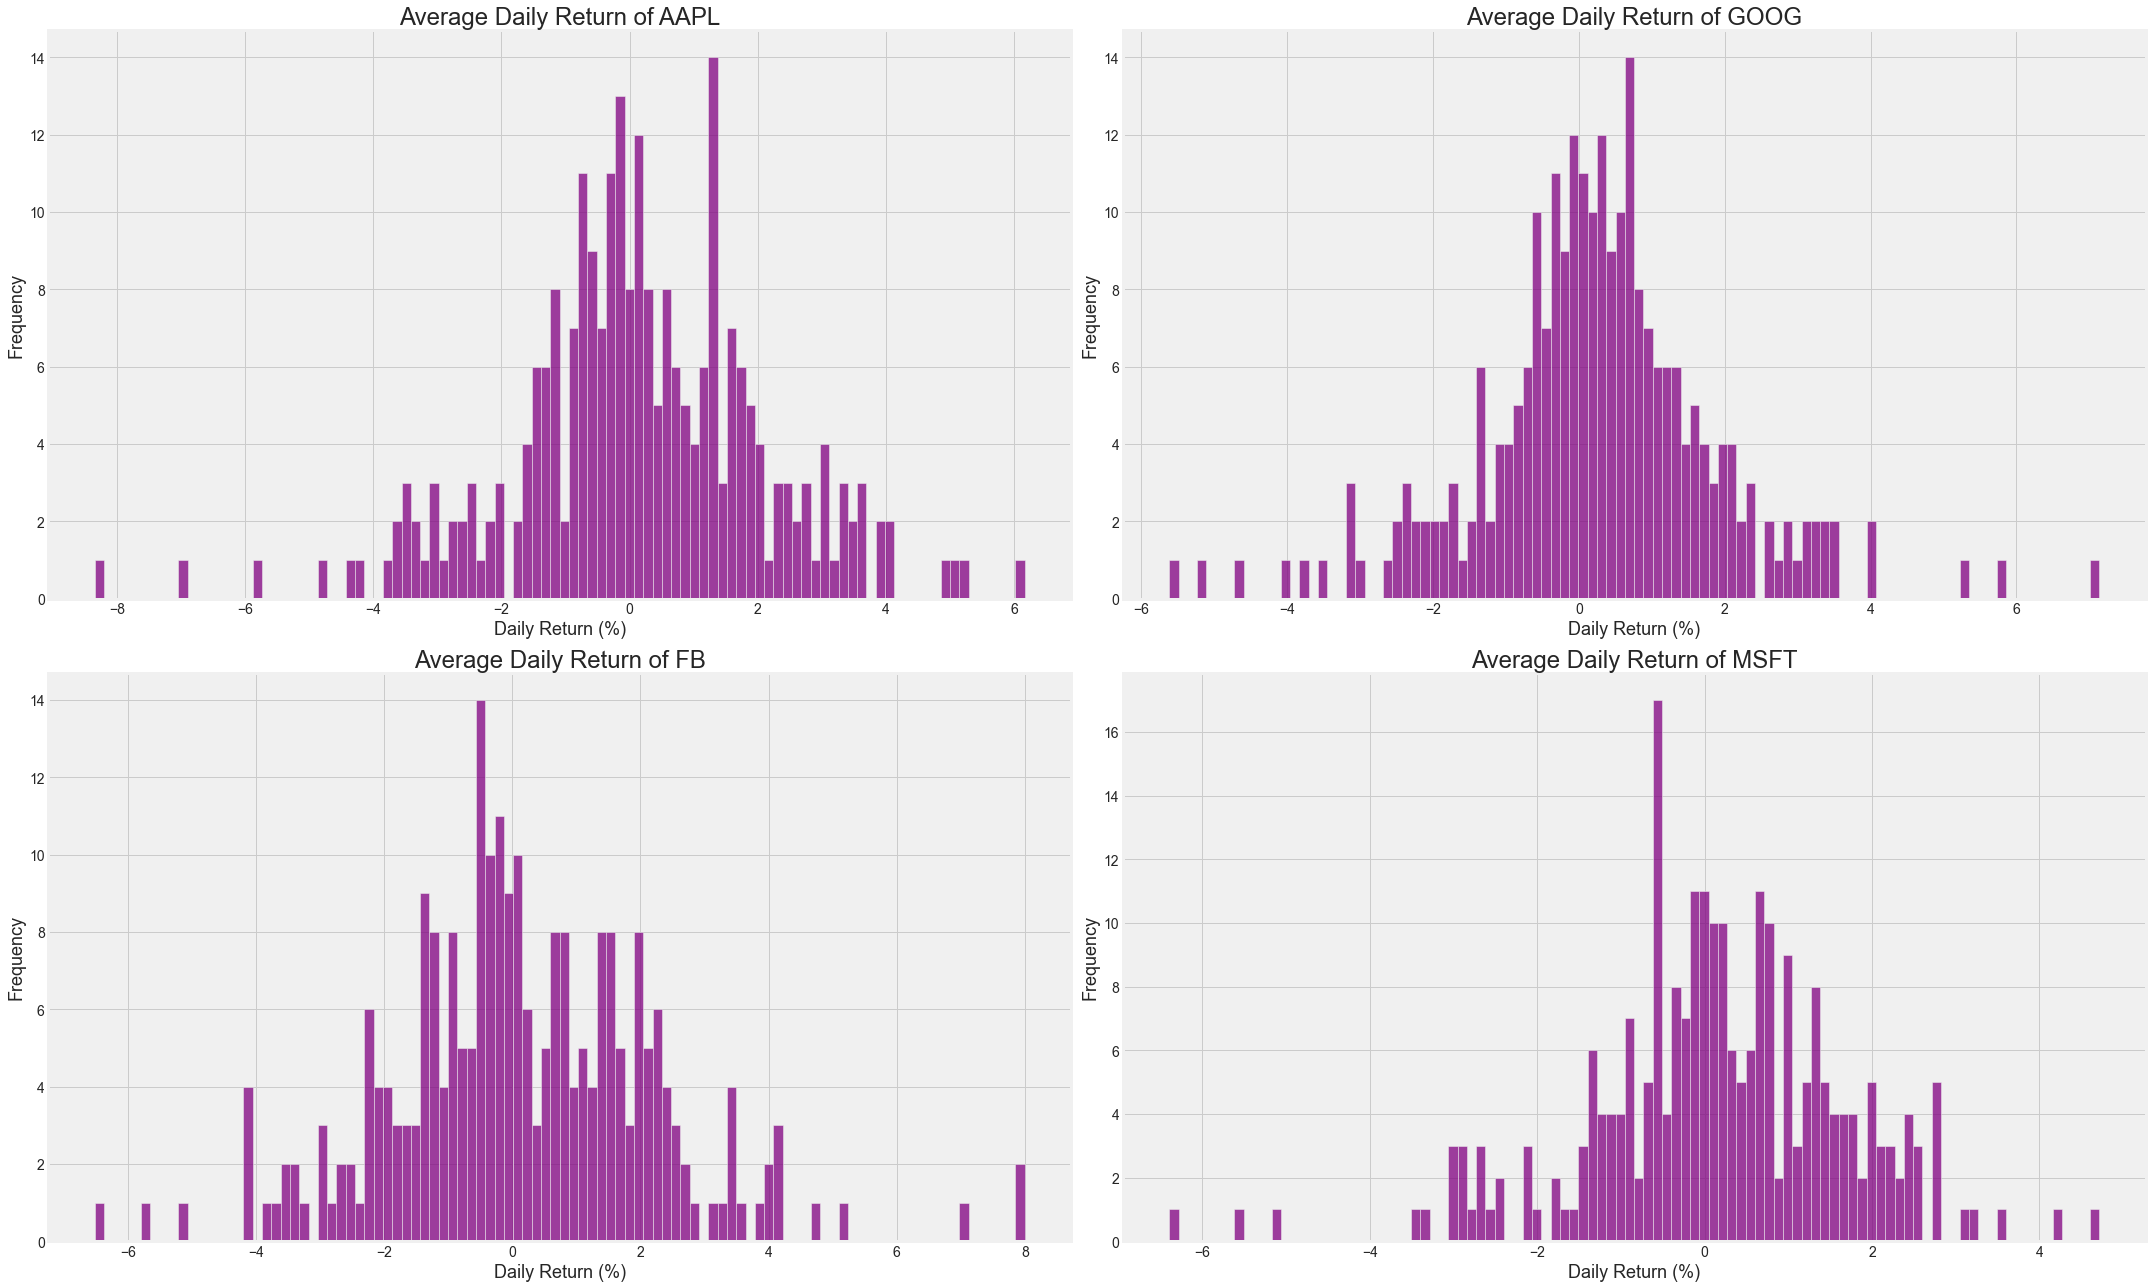

In [37]:
# 4 SUMMARY PLOTS OF AVERAGE DAILY RETURN HERE
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 18))


# Average Percent Change for AAPL based on natural logarithm (px_change_nat_log) to determine average daily return
df1_daily_return = df1['px_change_nat_log'] * 100
ax1 = sns.histplot(df1_daily_return.dropna(), bins=100, color='purple', ax=axes[0,0]);


# Average Percent Change for GOOG based on natural logarithm (px_change_nat_log) to determine average daily return
df2_daily_return = df2['px_change_nat_log'] * 100
ax2 = sns.histplot(df2_daily_return.dropna(), bins=100, color='purple', ax=axes[0,1]);


# # Average Percent Change for FB based on natural logarithm (px_change_nat_log) to determine average daily return
df3_daily_return = df3['px_change_nat_log'] * 100
ax3 = sns.histplot(df3_daily_return.dropna(), bins=100, color='purple', ax=axes[1,0]);


# # Average Percent Change for MSFT based on natural logarithm (px_change_nat_log) to determine average daily return
df4_daily_return = df4['px_change_nat_log'] * 100
ax4 = sns.histplot(df4_daily_return.dropna(), bins=100, color='purple', ax=axes[1,1]);



for i, _ax_ in enumerate(axes.flatten()):
    _ax_.set_ylabel('Frequency',fontsize=18)
    _ax_.set_xlabel('Daily Return (%)',fontsize=18)
    _ax_.set_title(f'Average Daily Return of {company_list[i]}',fontsize=24)
    _ax_.tick_params(axis="x", labelsize=14)
    _ax_.tick_params(axis="y", labelsize=14)
    plt.tight_layout()

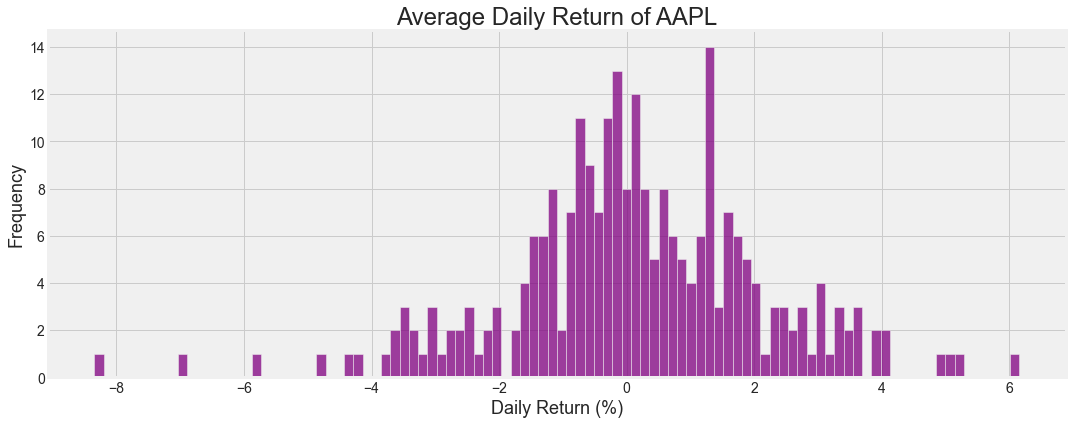

In [38]:
# Average Percent Change for AAPL based on natural logarithm (px_change_nat_log) to determine average daily return
plt.figure(figsize=(15, 6))

df1_daily_return = df1['px_change_nat_log'] * 100

sns.histplot(df1_daily_return.dropna(), bins=100, color='purple')
plt.ylabel('Frequency',fontsize=18)
plt.xlabel('Daily Return (%)',fontsize=18)
plt.title(f'Average Daily Return of {company_list[0]}',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

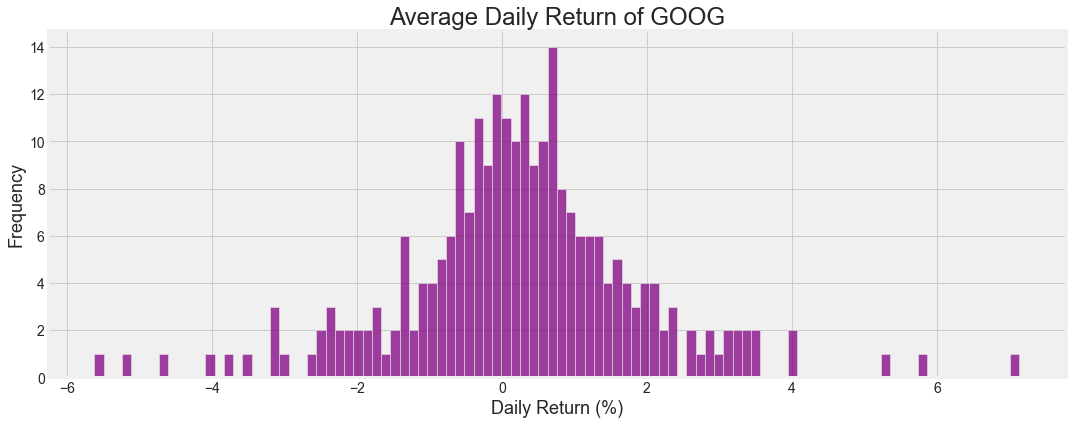

In [39]:
# Average Percent Change for GOOG based on natural logarithm (px_change_nat_log) to determine average daily return
plt.figure(figsize=(15, 6))

df2_daily_return = df2['px_change_nat_log'] * 100

sns.histplot(df2_daily_return.dropna(), bins=100, color='purple')
plt.ylabel('Frequency',fontsize=18)
plt.xlabel('Daily Return (%)',fontsize=18)
plt.title(f'Average Daily Return of {company_list[1]}',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

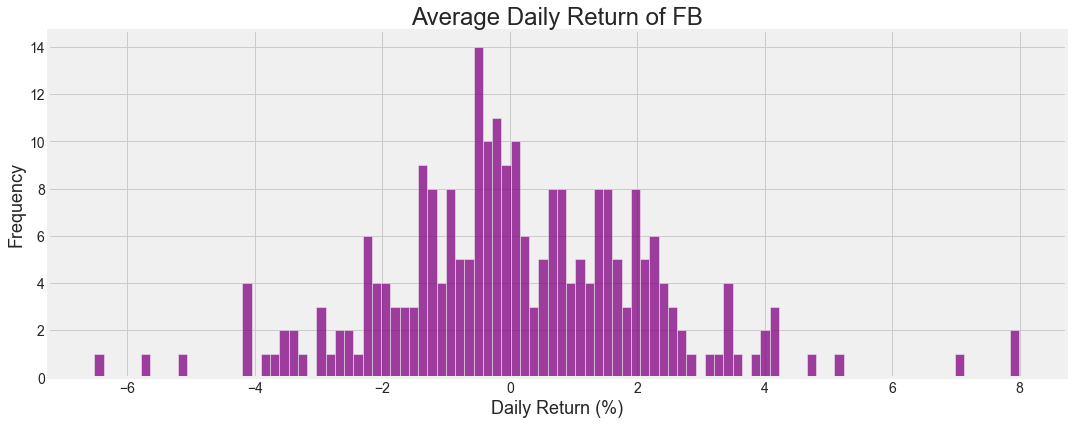

In [40]:
# Average Percent Change for GOOG based on natural logarithm (px_change_nat_log) to determine average daily return
plt.figure(figsize=(15, 6))

df3_daily_return = df3['px_change_nat_log'] * 100

sns.histplot(df3_daily_return.dropna(), bins=100, color='purple')
plt.ylabel('Frequency',fontsize=18)
plt.xlabel('Daily Return (%)',fontsize=18)
plt.title(f'Average Daily Return of {company_list[2]}',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

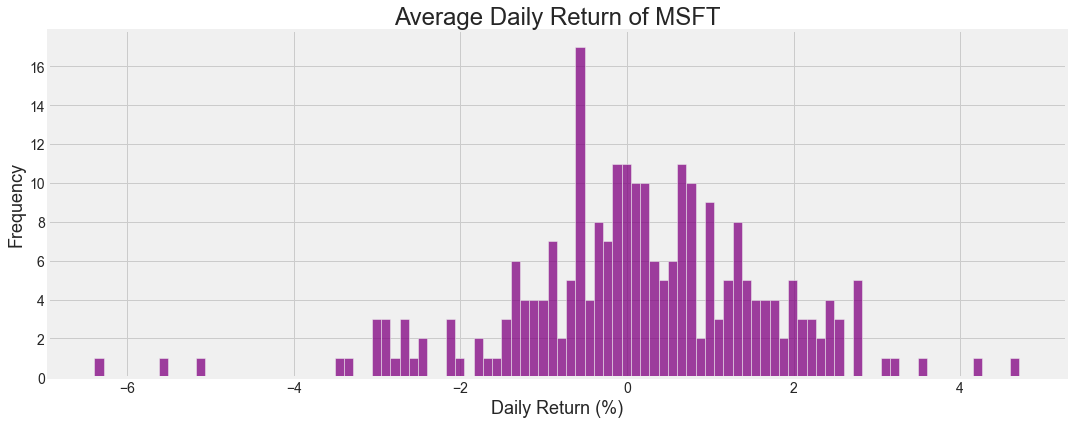

In [41]:
# Average Percent Change for MSFT based on natural logarithm (px_change_nat_log) to determine average daily return
plt.figure(figsize=(15, 6))

df4_daily_return = df4['px_change_nat_log'] * 100

sns.histplot(df4_daily_return.dropna(), bins=100, color='purple')
plt.ylabel('Frequency',fontsize=18)
plt.xlabel('Daily Return (%)',fontsize=18)
plt.title(f'Average Daily Return of {company_list[3]}',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

In [42]:
# Latest 10 days average daily return for AAPL

df1_latest_daily_return = df1_daily_return.tail(10).mean()

print(str(company_list[0]))
print("For reference, " + str(company_list[0]) + "'s latest 10 days daily return is " + str(f'{round(df1_latest_daily_return,2):,}') + "%.")
print('\n')


# Latest 10 days average daily return for GOOG

df2_latest_daily_return = df2_daily_return.tail(10).mean()

print(str(company_list[1]))
print("For reference, " + str(company_list[1]) + "'s latest 10 days daily return is " + str(f'{round(df2_latest_daily_return,2):,}') + "%.")
print('\n')


# Latest 10 days average daily return for FB

df3_latest_daily_return = df3_daily_return.tail(10).mean()

print(str(company_list[2]))
print("For reference, " + str(company_list[2]) + "'s latest 10 days daily return is " + str(f'{round(df3_latest_daily_return,2):,}') + "%.")
print('\n')


# Latest 10 days average daily return for MSFT

df4_latest_daily_return = df4_daily_return.tail(10).mean()

print(str(company_list[3]))
print("For reference, " + str(company_list[3]) + "'s latest 10 days daily return is " + str(f'{round(df4_latest_daily_return,2):,}') + "%.")
print('\n')


AAPL
For reference, AAPL's latest 10 days daily return is 0.19%.


GOOG
For reference, GOOG's latest 10 days daily return is 0.08%.


FB
For reference, FB's latest 10 days daily return is 0.04%.


MSFT
For reference, MSFT's latest 10 days daily return is 0.09%.




<a id='question5'></a>
## 5. Correlation between Stocks' Daily Return and Closing Price

In [43]:
# Putting all adj_close columns from all dfs into closing_price_dfs
closing_price_dfs = pd.DataFrame(columns=[f'{company_list[0]}',f'{company_list[1]}',f'{company_list[2]}',f'{company_list[3]}'])
closing_price_dfs[f'{company_list[0]}'] = df1['adj_close']
closing_price_dfs[f'{company_list[1]}'] = df2['adj_close']
closing_price_dfs[f'{company_list[2]}'] = df3['adj_close']
closing_price_dfs[f'{company_list[3]}'] = df4['adj_close']
closing_price_dfs.head()

,AAPL,GOOG,FB,MSFT
Date,,,,
2020-08-11,108.676010,1480.319946,256.130005,201.429657
2020-08-12,112.287788,1506.619995,259.890015,207.183945
2020-08-13,114.275002,1518.449951,261.299988,206.698624
2020-08-14,114.173164,1507.729980,261.239990,206.896698
2020-08-17,113.875069,1517.979980,261.160004,208.263489


In [44]:
# Putting all px_change_nat_log columns from all dfs into daily_returns_dfs
daily_returns_dfs = pd.DataFrame(columns=[f'{company_list[0]}',f'{company_list[1]}',f'{company_list[2]}',f'{company_list[3]}'])
daily_returns_dfs[f'{company_list[0]}'] = df1['px_change_nat_log'] * 100
daily_returns_dfs[f'{company_list[1]}'] = df2['px_change_nat_log'] * 100
daily_returns_dfs[f'{company_list[2]}'] = df3['px_change_nat_log'] * 100
daily_returns_dfs[f'{company_list[3]}'] = df4['px_change_nat_log'] * 100
daily_returns_dfs.head()

,AAPL,GOOG,FB,MSFT
Date,,,,
2020-08-11,NaN,NaN,NaN,NaN
2020-08-12,3.269404,1.761048,1.457337,2.816680
2020-08-13,1.754272,0.782132,0.541060,-0.234521
2020-08-14,-0.089156,-0.708485,-0.022964,0.095782
2020-08-17,-0.261432,0.677530,-0.030623,0.658443


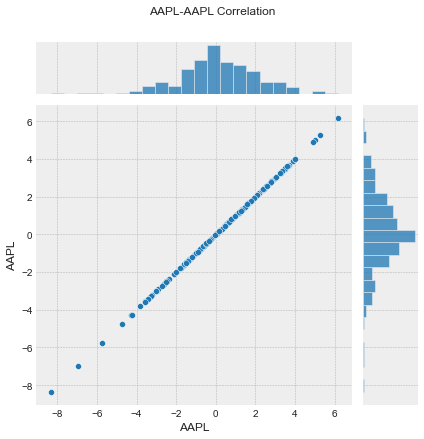

In [45]:
# Before plotting the correlation of all stocks, a stock should compare with itself to show linear correlation
# In this case, AAPL is tested
with plt.style.context('bmh'):
    sns.jointplot(x=daily_returns_dfs[f'{company_list[0]}'],
                  y=daily_returns_dfs[f'{company_list[0]}'],
                  kind='scatter', color='tab:blue').fig.suptitle("AAPL-AAPL Correlation",y=1.01)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()

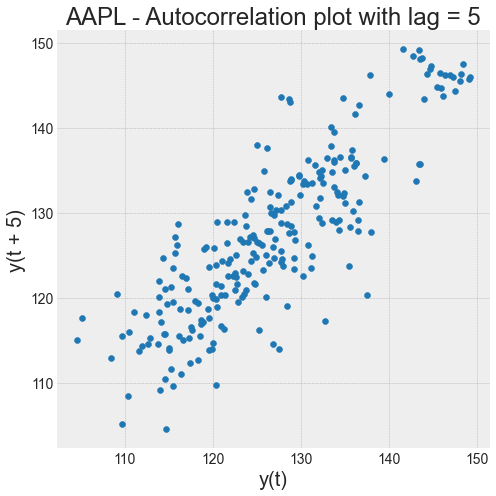

In [46]:
# Alternatively, a lag plot can be used to help evaluate whether the values in a dataset or time series are random.
with plt.style.context('bmh'):
    plt.figure(figsize=(7,7))
    plt.ylabel('Open Price Lag (5 Days)', fontsize=20)
    plt.xlabel('Open Price', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    lag_plot(df1['open'], lag=5, c='tab:blue')
    plt.title(f'{company_list[0]} - Autocorrelation plot with lag = 5',fontsize=24)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

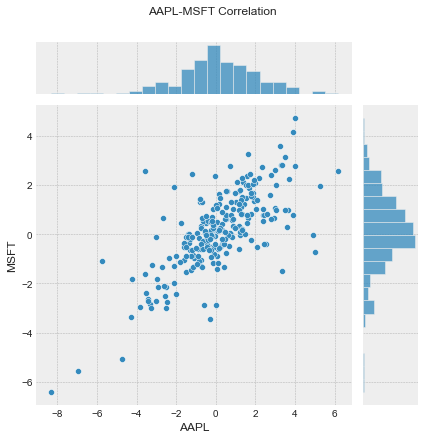

In [47]:
# With that, Joint Plot will be used to compare the daily returns of Apple and Microsoft to determine correlation
with plt.style.context('bmh'):
    sns.jointplot(x=daily_returns_dfs[f'{company_list[0]}'],
                  y=daily_returns_dfs[f'{company_list[3]}'], 
                  kind='scatter').fig.suptitle("AAPL-MSFT Correlation",y=1.01)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()

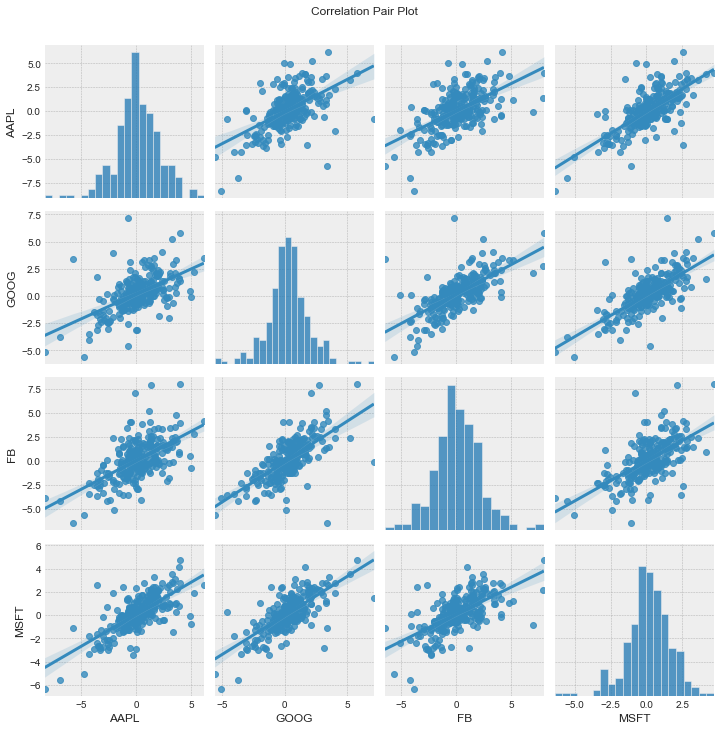

In [48]:
with plt.style.context('bmh'):
    sns.pairplot(daily_returns_dfs, kind='reg',
                 diag_kws=dict(color='tab:blue')).fig.suptitle("Correlation Pair Plot",y=1.01)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()

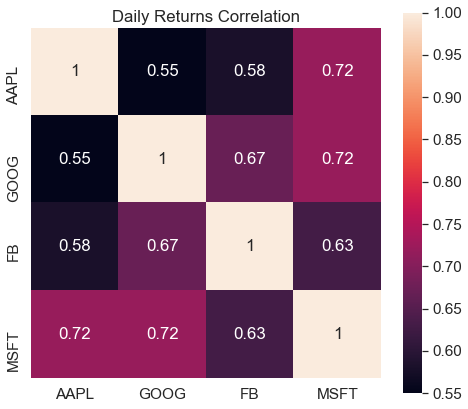

In [49]:
# Observe the daily returns correlation with Heatmap to see values
corr = daily_returns_dfs.corr().abs()
corr = np.around(corr,decimals=2) # Rounding off to 2 decimal places
sns.set(font_scale=1.4)
plt.figure(figsize=(7,7))
ax = plt.axes()
sns.heatmap(corr,annot=True,square=True, ax=ax)
ax.set_title('Daily Returns Correlation')
plt.show()

Microsoft appears to have a positive daily return correlation with Apple and Google.

It seems that if two stocks are positively correlated with each other, a linear relationship bewteen its daily return values should occur.

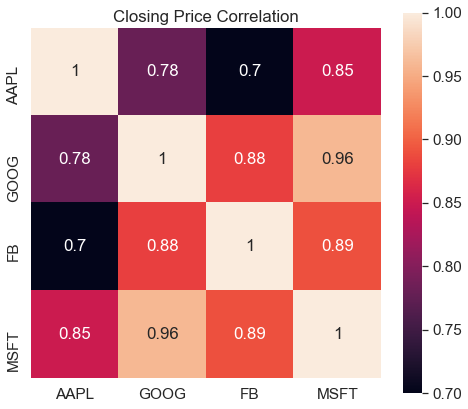

In [50]:
# Observe the closing price correlation with Heatmap to see values
corr = closing_price_dfs.corr().abs()
corr = np.around(corr,decimals=2) # Rounding off to 2 decimal places
sns.set(font_scale=1.4)
plt.figure(figsize=(7,7))
ax = plt.axes()
sns.heatmap(corr,annot=True,square=True, ax=ax)
ax.set_title('Closing Price Correlation')
plt.show()

Microsoft appears to have a positive closing price correlation with Google as well.

Interestingly, Facebook seems to have positive correlation to both Google and Microsoft.

<a id='question6'></a>
## 6. Value at Risk for Investing in Each Stock

In [51]:
# Determining Volatility using 10 window days
# In this analysis, volatility is determined by taking the standard deviation of price change for the past 10 days
# and multiplied by square root of 252.
# The number of window days can vary as desired. 10, 20, 50 or even 100 days.
# Window days + 1 because first row's nat log is always 0. In this case, we are using 10 days window.
# Therefore, 10 days + 1 = 11
# Sqrt 252 is used for daily trading days. Sqrt 12 for monthly.
df1['volatility'] = df1['px_change_nat_log'].rolling(window=11).std() * math.sqrt(252)
df2['volatility'] = df2['px_change_nat_log'].rolling(window=11).std() * math.sqrt(252)
df3['volatility'] = df3['px_change_nat_log'].rolling(window=11).std() * math.sqrt(252)
df4['volatility'] = df4['px_change_nat_log'].rolling(window=11).std() * math.sqrt(252)


In [52]:
# Latest 10 days volatility for AAPL

df1_latest_volatility = df1['volatility'].tail(1).mean() * 100

print(str(company_list[0]))
print("For reference, " + str(company_list[0]) + "'s latest 10 days volatility is " + str(f'{round(df1_latest_volatility,2):,}') + "%.")
print('\n')


# Latest 10 days volatility for GOOG

df2_latest_volatility = df2['volatility'].tail(1).mean() * 100

print(str(company_list[1]))
print("For reference, " + str(company_list[1]) + "'s latest 10 days volatility is " + str(f'{round(df2_latest_volatility,2):,}') + "%.")
print('\n')


# Latest 10 days volatility for FB

df3_latest_volatility = df3['volatility'].tail(1).mean() * 100

print(str(company_list[2]))
print("For reference, " + str(company_list[2]) + "'s latest 10 days volatility is " + str(f'{round(df3_latest_volatility,2):,}') + "%.")
print('\n')


# Latest 10 days volatility for MSFT

df4_latest_volatility = df4['volatility'].tail(1).mean() * 100

print(str(company_list[3]))
print("For reference, " + str(company_list[3]) + "'s latest 10 days volatility is " + str(f'{round(df4_latest_volatility,2):,}') + "%.")
print('\n')


AAPL
For reference, AAPL's latest 10 days volatility is 10.45%.


GOOG
For reference, GOOG's latest 10 days volatility is 7.64%.


FB
For reference, FB's latest 10 days volatility is 24.45%.


MSFT
For reference, MSFT's latest 10 days volatility is 9.0%.




In [53]:
# Determining the closing price range based on the 10 days volatility
# For example, if a stock has a price of $100 and an implied volatility of 30%, that means its price will most likely
# stay between $70 and $130 over the course of the next day (or month or year etc).
# That $30 range on either side is known statistically as one standard deviation.
# Therefore:

# AAPL
df1_latest_volatility_lower_range = (1 - (df1_latest_volatility/100)) * df1_latest_adj_close
df1_latest_volatility_higher_range = (1 + (df1_latest_volatility/100)) * df1_latest_adj_close

# GOOG
df2_latest_volatility_lower_range = (1 - (df2_latest_volatility/100)) * df2_latest_adj_close
df2_latest_volatility_higher_range = (1 + (df2_latest_volatility/100)) * df2_latest_adj_close

# FB
df3_latest_volatility_lower_range = (1 - (df3_latest_volatility/100)) * df3_latest_adj_close
df3_latest_volatility_higher_range = (1 + (df3_latest_volatility/100)) * df3_latest_adj_close

# MSFT
df4_latest_volatility_lower_range = (1 - (df4_latest_volatility/100)) * df4_latest_adj_close
df4_latest_volatility_higher_range = (1 + (df4_latest_volatility/100)) * df4_latest_adj_close


In [54]:
print(str(company_list[0]))
print("With 10 days volatility at " + str((f'{round(df1_latest_volatility,2):}')) + "% and latest close price at $" + str((f'{round(df1_latest_adj_close,2):}')) + ", " + str(company_list[0]) + "'s next price may range from $" + str((f'{round(df1_latest_volatility_lower_range,2):}')) + " to $" + str((f'{round(df1_latest_volatility_higher_range,2):}')) + ".")
print("Do note that the average daily return for the past 10 days is at "+ str(f'{round(df1_latest_daily_return,2):,}') + "% and the past 10 days moving average is at $" + str((f'{round(df1_10days,2):}')) + ".")
print('\n')

print(str(company_list[1]))
print("With 10 days volatility at " + str((f'{round(df2_latest_volatility,2):}')) + "% and latest close price at $" + str((f'{round(df2_latest_adj_close,2):}')) + ", " + str(company_list[1]) + "'s next price may range from $" + str((f'{round(df2_latest_volatility_lower_range,2):}')) + " to $" + str((f'{round(df2_latest_volatility_higher_range,2):}')) + ".")
print("Do note that the average daily return for the past 10 days is at "+ str(f'{round(df2_latest_daily_return,2):,}') + "% and the past 10 days moving average is at $" + str((f'{round(df2_10days,2):}')) + ".")
print('\n')

print(str(company_list[2]))
print("With 10 days volatility at " + str((f'{round(df3_latest_volatility,2):}')) + "% and latest close price at $" + str((f'{round(df3_latest_adj_close,2):}')) + ", " + str(company_list[2]) + "'s next price may range from $" + str((f'{round(df3_latest_volatility_lower_range,2):}')) + " to $" + str((f'{round(df3_latest_volatility_higher_range,2):}')) + ".")
print("Do note that the average daily return for the past 10 days is at "+ str(f'{round(df3_latest_daily_return,2):,}') + "% and the past 10 days moving average is at $" + str((f'{round(df3_10days,2):}')) + ".")
print('\n')

print(str(company_list[3]))
print("With 10 days volatility at " + str((f'{round(df4_latest_volatility,2):}')) + "% and latest close price at $" + str((f'{round(df4_latest_adj_close,2):}')) + ", " + str(company_list[0]) + "'s next price may range from $" + str((f'{round(df4_latest_volatility_lower_range,2):}')) + " to $" + str((f'{round(df4_latest_volatility_higher_range,2):}')) + ".")
print("Do note that the average daily return for the past 10 days is at "+ str(f'{round(df4_latest_daily_return,2):,}') + "% and the past 10 days moving average is at $" + str((f'{round(df4_10days,2):}')) + ".")
print('\n')

AAPL
With 10 days volatility at 10.45% and latest close price at $148.19, AAPL's next price may range from $132.7 to $163.68.
Do note that the average daily return for the past 10 days is at 0.19% and the past 10 days moving average is at $146.35.


GOOG
With 10 days volatility at 7.64% and latest close price at $2753.41, GOOG's next price may range from $2543.18 to $2963.64.
Do note that the average daily return for the past 10 days is at 0.08% and the past 10 days moving average is at $2737.91.


FB
With 10 days volatility at 24.45% and latest close price at $359.81, FB's next price may range from $271.82 to $447.8.
Do note that the average daily return for the past 10 days is at 0.04% and the past 10 days moving average is at $358.74.


MSFT
With 10 days volatility at 9.0% and latest close price at $289.16, AAPL's next price may range from $263.13 to $315.19.
Do note that the average daily return for the past 10 days is at 0.09% and the past 10 days moving average is at $287.32.




<a id='question7'></a>
## 7. Prediction with ARIMA Time-Series Forecast

### APPL Prediction
We will predict 7 days out-of-sample forecast for APPL using the ARIMA (AutoRegressive Integrated Moving Average) Time-Series.

In [55]:
df1.head()

,open,high,low,close,adj_close,volume,company_name,ma_10_days,ma_20_days,ma_50_days,px_change_nat_log,volatility
Date,,,,,,,,,,,,
2020-08-11,111.970001,112.482498,109.107498,109.375000,108.676010,187902400,APPLE,NaN,NaN,NaN,NaN,NaN
2020-08-12,110.497498,113.275002,110.297501,113.010002,112.287788,165598000,APPLE,NaN,NaN,NaN,0.032694,NaN
2020-08-13,114.430000,116.042503,113.927498,115.010002,114.275002,210082000,APPLE,NaN,NaN,NaN,0.017543,NaN
2020-08-14,114.830002,115.000000,113.044998,114.907501,114.173164,165565200,APPLE,NaN,NaN,NaN,-0.000892,NaN
2020-08-17,116.062500,116.087502,113.962502,114.607498,113.875069,119561600,APPLE,NaN,NaN,NaN,-0.002614,NaN


In [56]:
series = df1['adj_close']

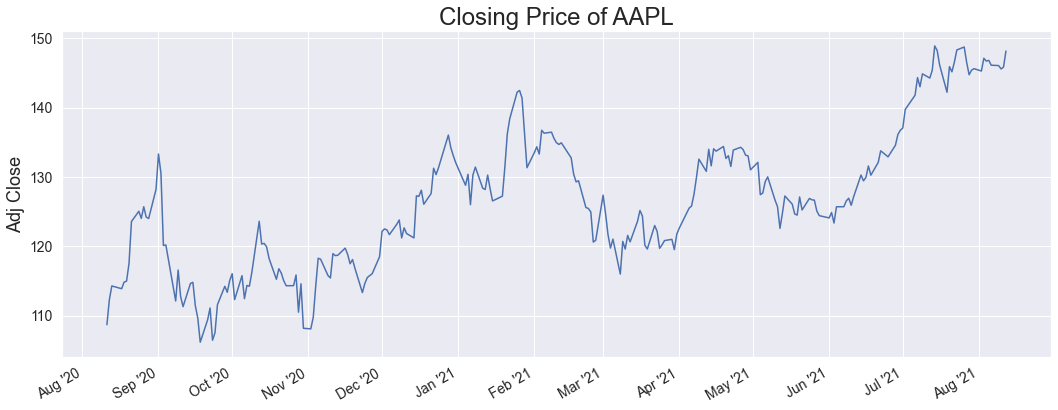

In [57]:
#series.plot();

# Let's observe once more on APPL's closing price for the past 1 year

plt.figure(figsize=(15, 6))


ax = series.plot()
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Closing Price of {company_list[0]}",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set both the Locator and the Formatter to show months for x-axis
months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.tight_layout()

In [58]:
# Let's split the data into 2; dataset and validation. We will do a 80% split here.
split_point = int(len(series)*0.8)
print(split_point)

203


In [59]:
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 203, Validation 51


In [60]:
# Fit stepwise auto-ARIMA. Auto-ARIMA tests series for stationarity and handles the differencing part automatically.
# Auto-ARIMA is a lot more convenient in this case vs. the traditional ARIMA.
model = auto_arima(dataset, 
                      start_p=1, # Starting value of p in stepwise procedure
                      start_q=1, # Starting value of q in stepwise procedure
                      max_p=20, # Maximum value of P
                      max_q=20, # Maximum value of Q
                      m=12, # refers to the number of periods in each season. M is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data. Default is 1. 
                      start_P=0, # Starting value of P in stepwise procedure
                      seasonal=True,
                      d=1, # Order of first-differencing
                      D=1, # Order of seasonal-differencing
#                       trace=True,
#                       error_action='ignore', 
#                       suppress_warnings=True,
#                       stepwise=True
                     )

In [61]:
# Let's observe the model's summary. SARIMAX stands for Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  203
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -469.461
Date:                              Thu, 12 Aug 2021   AIC                            946.921
Time:                                      23:15:04   BIC                            959.910
Sample:                                           0   HQIC                           952.183
                                              - 203                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1756      0.098     -1.790      0.073      -0.368       0.017
ar.S.L24      -0.1101      0.094     -1.174      0.240      -0.294       0.074
ma.S.L12      -0.8715      0.122     -7.133      0.000      -1.111      -0.632
sigma2         7.2761      0.825      8.815      0.000       5.658       8.894
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.66   Prob(JB):                         0.68
Heteroskedasticity (H):               0.50   Skew:                             0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
# The warnings is more of a "note" than a "warning". It's just letting us know how the covariance matrix was computed.

In [63]:
# Let's check the model.order
# Lag value is 0 autoregression
# Uses a difference order of 1 to make the time series stationary
# And uses a moving average mode of 0
print(model.order)

(0, 1, 0)


In [64]:
# Let's define the first out-of-sample day or step
# where;
# fc = forecast
# conf_int = confidence interval

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

# For every new observation in validation, use the defined function
for new_ob in validation:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of Maximum Likelihood Estimation (MLE) steps
    model.update(new_ob)

    
# For MSE, the lower the better, but because it has no upper bound, it is hard to determine how accurate the forecast is.
print(f"Mean squared error: {mean_squared_error(validation, forecasts)}")


# Mean Absolute Percentage Error (MAPE) is a measure of how accurate a forecast system is.
# It measures this accuracy as a percentage, and can be calculated as the average absolute percent error
# for each time period minus actual values divided by actual values.

mape = MAPE(validation, forecasts)
print(f"{mape:.3f}% MAPE implies the model is about {100-mape:.3f}% accurate on validation set.")

Mean squared error: 3.4214810403606437
0.011% MAPE implies the model is about 99.989% accurate on validation set.


In [65]:
# Now that we have defined a day's forecast, let's predict 7 more days of out-of-sample forecast.
predictions = model.predict(n_periods=7)

In [66]:
# 7 days forecast
for index, date in enumerate(pd.date_range(validation.index[-1] + pd.DateOffset(1), periods=7, freq='D')):
    print(date.date(), ':', predictions[index])

2021-08-13 : 149.0883354211109
2021-08-14 : 148.6506723105316
2021-08-15 : 149.10534904633514
2021-08-16 : 149.5476917740502
2021-08-17 : 150.3458153667388
2021-08-18 : 149.99044791104686
2021-08-19 : 150.59771620992967


In [67]:
# Forecasted series based on remaining 20% dataset
forecasted_series = pd.Series(data=forecasts, index=validation.index)

# Further prediction of 7 days out-of-sample
further_prediction = pd.Series(data=predictions, index=pd.date_range(validation.index[-1] + pd.DateOffset(1), periods=7, freq='D'))

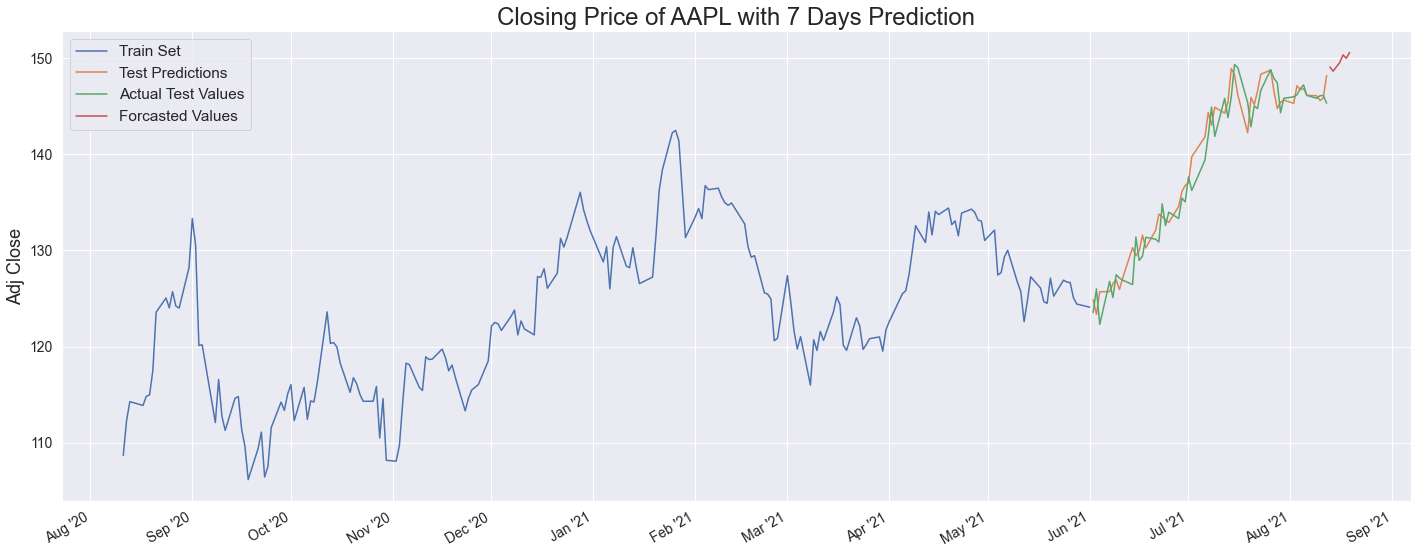

In [68]:
# Let's plot the 7 days forecast with the dataset to see how it looks like visually
plt.figure(figsize=(20, 8))


ax = dataset.plot(label='Train Set')
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Closing Price of {company_list[0]} with 7 Days Prediction",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.plot(dataset, label="Train Set");
plt.plot(validation, label='Test Predictions');
plt.plot(forecasted_series, label='Actual Test Values');
plt.plot(further_prediction, label="Forcasted Values");
plt.legend();

months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.tight_layout()

In [69]:
# The 7 days are stored in further_prediction. This can be extracted for use if required.

#print(further_prediction)
#further_prediction.head().to_excel('df1_prediction.xlsx')

### GOOG Prediction
We will predict 7 days out-of-sample forecast for GOOG next, using the ARIMA Time-Series.

In [70]:
# Setting df2 as the new updated series
series = df2['adj_close']

# Splitting the data into 2; dataset and validation. We will do a 80% split here.
split_point = int(len(series)*0.8)
print(split_point)

dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))


203
Dataset 203, Validation 51


In [71]:
# Fit stepwise auto-ARIMA. Auto-ARIMA tests series for stationarity and handles the differencing part automatically.
# Auto-ARIMA is a lot more convenient in this case vs. the traditional ARIMA.
model = auto_arima(dataset, 
                      start_p=1, # Starting value of p in stepwise procedure
                      start_q=1, # Starting value of q in stepwise procedure
                      max_p=20, # Maximum value of P
                      max_q=20, # Maximum value of Q
                      m=12, # refers to the number of periods in each season. M is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data. Default is 1. 
                      start_P=0, # Starting value of P in stepwise procedure
                      seasonal=True,
                      d=1, # Order of first-differencing
                      D=1, # Order of seasonal-differencing
#                       trace=True,
#                       error_action='ignore', 
#                       suppress_warnings=True,
#                       stepwise=True
                     )

In [72]:
# Let's observe the model's summary and model order.
model.summary()

print(model.order)

(1, 1, 1)


In [73]:
# Let's define the first out-of-sample day or step
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

# For every new observation in validation, use the defined function
for new_ob in validation:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of Maximum Likelihood Estimation (MLE) steps
    model.update(new_ob)

# MSE for GOOG
print(f"Mean squared error: {mean_squared_error(validation, forecasts)}")

# MAPE for GOOG
mape = MAPE(validation, forecasts)
print(f"{mape:.3f}% MAPE implies the model is about {100-mape:.3f}% accurate on validation set.")

Mean squared error: 1131.0570220204168
0.009% MAPE implies the model is about 99.991% accurate on validation set.


In [74]:
# Now that we have defined a day's forecast, let's predict 7 more days of out-of-sample forecast.
predictions = model.predict(n_periods=7)

In [75]:
# 7 days forecast
for index, date in enumerate(pd.date_range(validation.index[-1] + pd.DateOffset(1), periods=7, freq='D')):
    print(date.date(), ':', predictions[index])

2021-08-13 : 2754.0127482545568
2021-08-14 : 2764.0757833190623
2021-08-15 : 2762.852978910201
2021-08-16 : 2759.359438034771
2021-08-17 : 2758.3637628091074
2021-08-18 : 2733.5560441649045
2021-08-19 : 2759.5228660957164


In [76]:
# Forecasted series based on remaining 20% dataset
forecasted_series = pd.Series(data=forecasts, index=validation.index)

# Further prediction of 7 days out-of-sample
further_prediction = pd.Series(data=predictions, index=pd.date_range(validation.index[-1] + pd.DateOffset(1), periods=7, freq='D'))

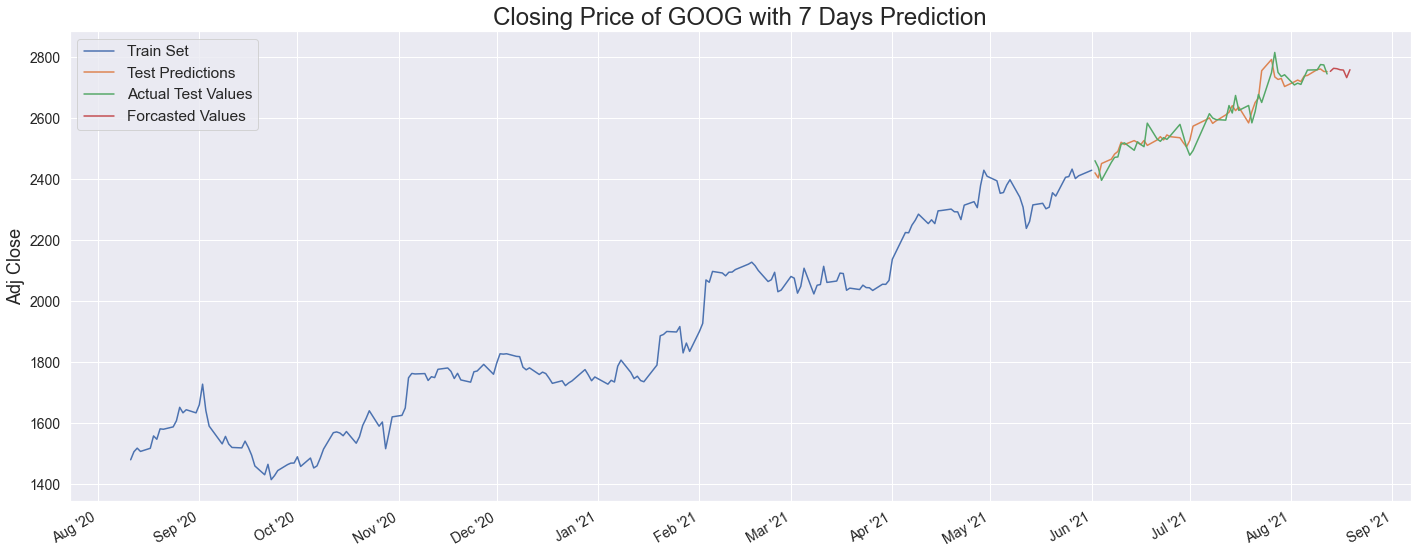

In [77]:
# Let's plot the 7 days forecast with the dataset to see how it looks like visually
plt.figure(figsize=(20, 8))


ax = dataset.plot(label='Train Set')
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Closing Price of {company_list[1]} with 7 Days Prediction",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.plot(dataset, label="Train Set");
plt.plot(validation, label='Test Predictions');
plt.plot(forecasted_series, label='Actual Test Values');
plt.plot(further_prediction, label="Forcasted Values");
plt.legend();

months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.tight_layout()

In [78]:
# The 7 days are stored in further_prediction. This can be extracted for use if required.

#print(further_prediction)
#further_prediction.head().to_excel('df2_prediction.xlsx')

### FB Prediction
We will predict 7 days out-of-sample forecast for FB next, using the ARIMA Time-Series.

In [79]:
# Setting df3 as the new updated series
series = df3['adj_close']

# Splitting the data into 2; dataset and validation. We will do a 80% split here.
split_point = int(len(series)*0.8)
print(split_point)

dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))


203
Dataset 203, Validation 51


In [80]:
# Fit stepwise auto-ARIMA. Auto-ARIMA tests series for stationarity and handles the differencing part automatically.
# Auto-ARIMA is a lot more convenient in this case vs. the traditional ARIMA.
model = auto_arima(dataset, 
                      start_p=1, # Starting value of p in stepwise procedure
                      start_q=1, # Starting value of q in stepwise procedure
                      max_p=20, # Maximum value of P
                      max_q=20, # Maximum value of Q
                      m=12, # refers to the number of periods in each season. M is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data. Default is 1. 
                      start_P=0, # Starting value of P in stepwise procedure
                      seasonal=True,
                      d=1, # Order of first-differencing
                      D=1, # Order of seasonal-differencing
#                       trace=True,
#                       error_action='ignore', 
#                       suppress_warnings=True,
#                       stepwise=True
                     )

In [81]:
# Let's observe the model's summary and model order.
model.summary()

print(model.order)

(0, 1, 0)


In [82]:
# Let's define the first out-of-sample day or step
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

# For every new observation in validation, use the defined function
for new_ob in validation:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of Maximum Likelihood Estimation (MLE) steps
    model.update(new_ob)

# MSE for GOOG
print(f"Mean squared error: {mean_squared_error(validation, forecasts)}")

# MAPE for GOOG
mape = MAPE(validation, forecasts)
print(f"{mape:.3f}% MAPE implies the model is about {100-mape:.3f}% accurate on validation set.")

Mean squared error: 40.80982602374364
0.014% MAPE implies the model is about 99.986% accurate on validation set.


In [83]:
# Now that we have defined a day's forecast, let's predict 7 more days of out-of-sample forecast.
predictions = model.predict(n_periods=7)

In [84]:
# 7 days forecast
for index, date in enumerate(pd.date_range(validation.index[-1] + pd.DateOffset(1), periods=7, freq='D')):
    print(date.date(), ':', predictions[index])

2021-08-13 : 362.8743522610409
2021-08-14 : 359.0867119868549
2021-08-15 : 356.6037076865597
2021-08-16 : 361.00341966568647
2021-08-17 : 358.3160235958678
2021-08-18 : 357.8727827663421
2021-08-19 : 363.2715944429941


In [85]:
# Forecasted series based on remaining 20% dataset
forecasted_series = pd.Series(data=forecasts, index=validation.index)

# Further prediction of 7 days out-of-sample
further_prediction = pd.Series(data=predictions, index=pd.date_range(validation.index[-1] + pd.DateOffset(1), periods=7, freq='D'))

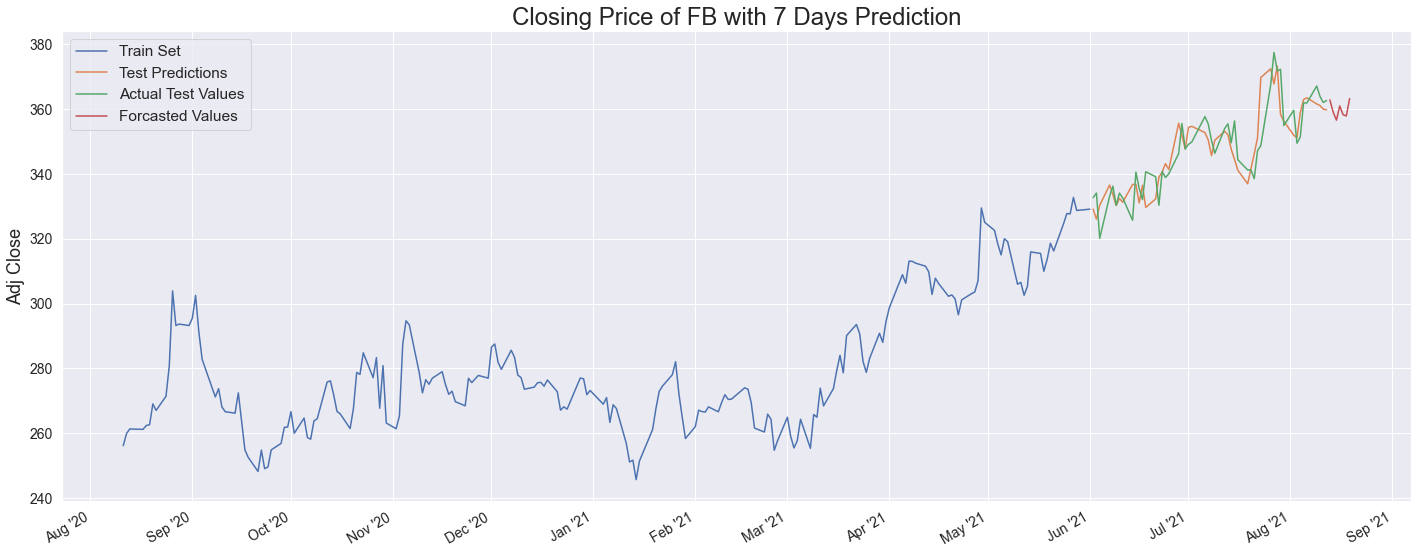

In [86]:
# Let's plot the 7 days forecast with the dataset to see how it looks like visually
plt.figure(figsize=(20, 8))


ax = dataset.plot(label='Train Set')
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Closing Price of {company_list[2]} with 7 Days Prediction",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.plot(dataset, label="Train Set");
plt.plot(validation, label='Test Predictions');
plt.plot(forecasted_series, label='Actual Test Values');
plt.plot(further_prediction, label="Forcasted Values");
plt.legend();

months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.tight_layout()

In [87]:
# The 7 days are stored in further_prediction. This can be extracted for use if required.

#print(further_prediction)
#further_prediction.head().to_excel('df3_prediction.xlsx')

### MSFT Prediction
We will predict 7 days out-of-sample forecast for MSFT next, using the ARIMA Time-Series.

In [88]:
# Setting df4 as the new updated series
series = df4['adj_close']

# Splitting the data into 2; dataset and validation. We will do a 80% split here.
split_point = int(len(series)*0.8)
print(split_point)

dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))


203
Dataset 203, Validation 51


In [89]:
# Fit stepwise auto-ARIMA. Auto-ARIMA tests series for stationarity and handles the differencing part automatically.
# Auto-ARIMA is a lot more convenient in this case vs. the traditional ARIMA.
model = auto_arima(dataset, 
                      start_p=1, # Starting value of p in stepwise procedure
                      start_q=1, # Starting value of q in stepwise procedure
                      max_p=20, # Maximum value of P
                      max_q=20, # Maximum value of Q
                      m=12, # refers to the number of periods in each season. M is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data. Default is 1. 
                      start_P=0, # Starting value of P in stepwise procedure
                      seasonal=True,
                      d=1, # Order of first-differencing
                      D=1, # Order of seasonal-differencing
#                       trace=True,
#                       error_action='ignore', 
#                       suppress_warnings=True,
#                       stepwise=True
                     )

In [90]:
# Let's observe the model's summary and model order.
model.summary()

print(model.order)

(1, 1, 1)


In [91]:
# Let's define the first out-of-sample day or step
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

# For every new observation in validation, use the defined function
for new_ob in validation:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of Maximum Likelihood Estimation (MLE) steps
    model.update(new_ob)

# MSE for GOOG
print(f"Mean squared error: {mean_squared_error(validation, forecasts)}")

# MAPE for GOOG
mape = MAPE(validation, forecasts)
print(f"{mape:.3f}% MAPE implies the model is about {100-mape:.3f}% accurate on validation set.")

Mean squared error: 5.961594975516702
0.007% MAPE implies the model is about 99.993% accurate on validation set.


In [92]:
# Now that we have defined a day's forecast, let's predict 7 more days of out-of-sample forecast.
predictions = model.predict(n_periods=7)

In [93]:
# 7 days forecast
for index, date in enumerate(pd.date_range(validation.index[-1] + pd.DateOffset(1), periods=7, freq='D')):
    print(date.date(), ':', predictions[index])

2021-08-13 : 290.1622995141363
2021-08-14 : 290.5599783903049
2021-08-15 : 290.32941185403905
2021-08-16 : 292.73855145342327
2021-08-17 : 294.2059707908271
2021-08-18 : 292.7096341059342
2021-08-19 : 292.97958447306985


In [94]:
# Forecasted series based on remaining 20% dataset
forecasted_series = pd.Series(data=forecasts, index=validation.index)

# Further prediction of 7 days out-of-sample
further_prediction = pd.Series(data=predictions, index=pd.date_range(validation.index[-1] + pd.DateOffset(1), periods=7, freq='D'))

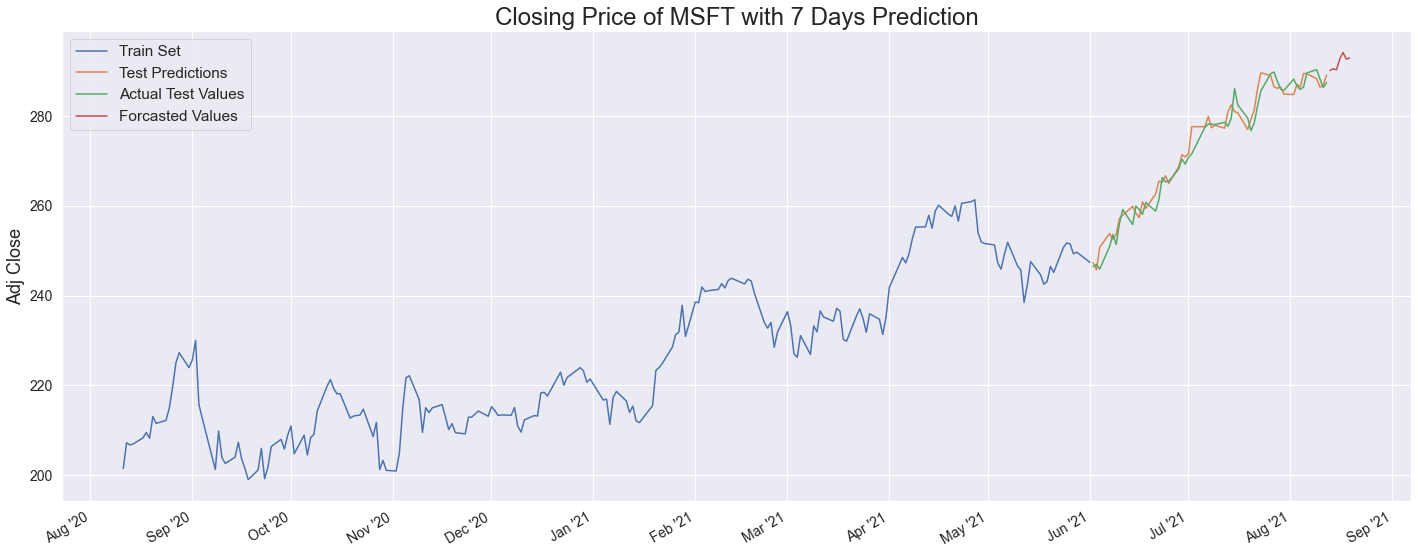

In [95]:
# Let's plot the 7 days forecast with the dataset to see how it looks like visually
plt.figure(figsize=(20, 8))


ax = dataset.plot(label='Train Set')
plt.ylabel('Adj Close',fontsize=18)
plt.xlabel(None)
plt.title(f"Closing Price of {company_list[3]} with 7 Days Prediction",fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.plot(dataset, label="Train Set");
plt.plot(validation, label='Test Predictions');
plt.plot(forecasted_series, label='Actual Test Values');
plt.plot(further_prediction, label="Forcasted Values");
plt.legend();

months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.tight_layout()

This concludes the end of the stock market analysis and prediction with ARIMA.

In [ ]:
# The 7 days are stored in further_prediction. This can be extracted for use if required.

#print(further_prediction)
#further_prediction.head().to_excel('df2_prediction.xlsx')

In [97]:
# if bmh style is prefered for forecasting visuals
# with plt.style.context('bmh'):
#     plt.figure(figsize=(20, 8))


#     ax = dataset.plot(label='Train Set')
#     plt.ylabel('Adj Close',fontsize=18)
#     plt.xlabel(None)
#     plt.title(f"Closing Price of {company_list[3]} with 7 Days Prediction",fontsize=24)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)

#     #plt.plot(dataset, label="Train Set");
#     plt.plot(validation, label='Test Predictions');
#     plt.plot(forecasted_series, label='Actual Test Values');
#     plt.plot(further_prediction, label="Forcasted Values");
#     plt.legend();

#     months = MonthLocator()
#     monthsFmt = DateFormatter("%b '%y")
#     ax.xaxis.set_major_locator(months)
#     ax.xaxis.set_major_formatter(monthsFmt)

#     plt.tight_layout()